In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
application=pd.read_csv("D:/kaggle/competitions/home-credit-default-risk/application_train.csv")


In [3]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


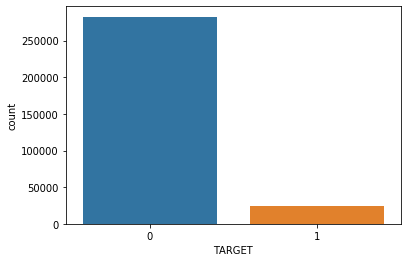

In [5]:
sn.countplot(application['TARGET'])

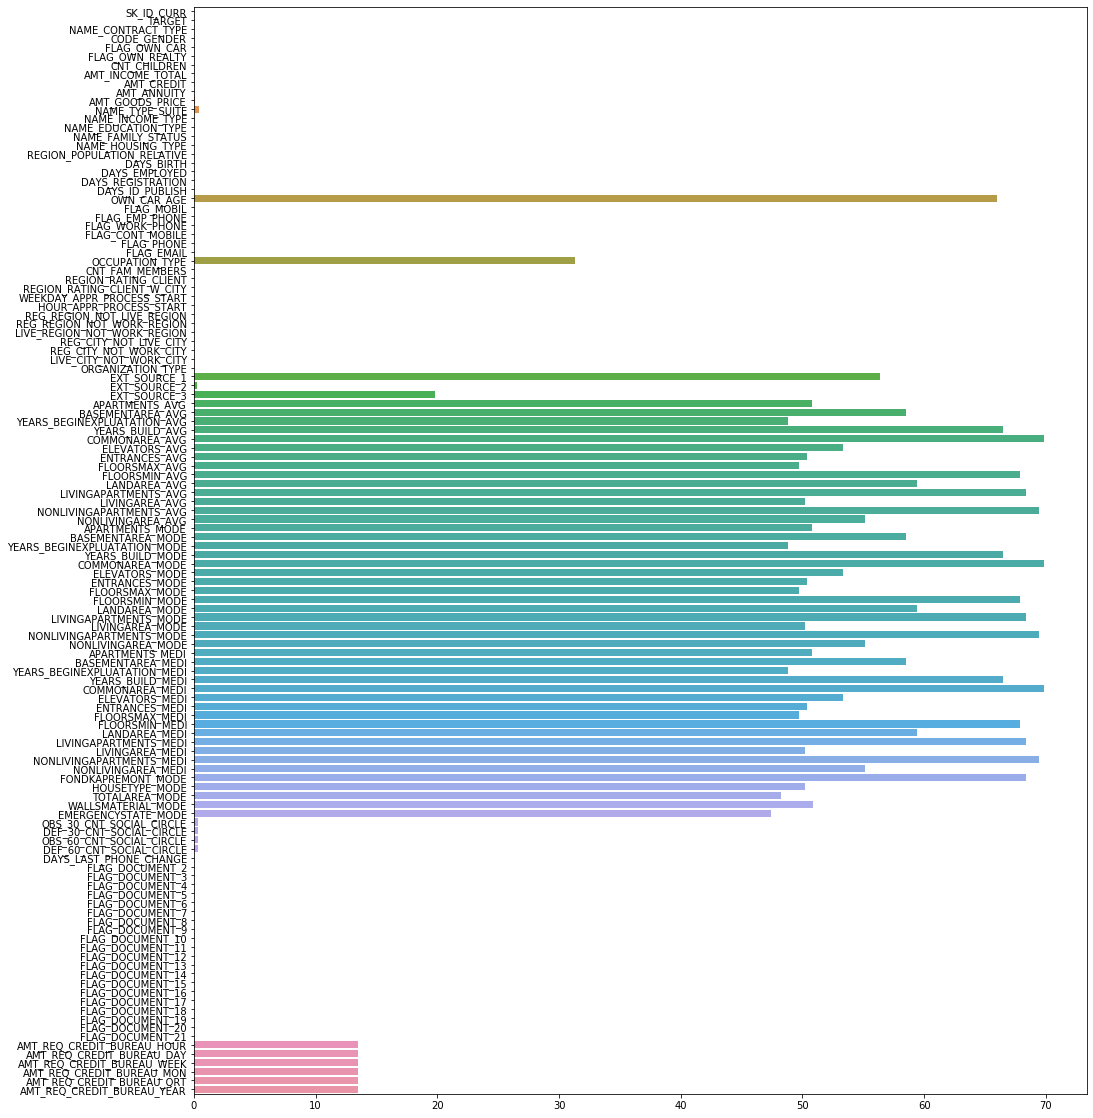

In [6]:
plt.figure(figsize=(16,20))
sn.barplot((application.isna().sum()/application.shape[0])*100,application.isna().sum().index)


In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [8]:
enc=LabelEncoder()


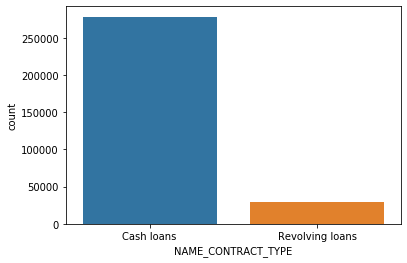

In [9]:
sn.countplot(application['NAME_CONTRACT_TYPE'])

In [10]:
application.rename(columns={'NAME_CONTRACT_TYPE':'contract_type'},inplace=True)

In [11]:
contract_enc=OneHotEncoder(drop='first',sparse=False)
contract_enc.fit(application[['contract_type']])


OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [12]:
cols=list(np.array(contract_enc.categories_)[:,1:])
contract=pd.DataFrame(contract_enc.transform(application[['contract_type']]),columns=cols)
application=application.join(contract,on=application.index)
application.drop('contract_type',axis=1,inplace=True)

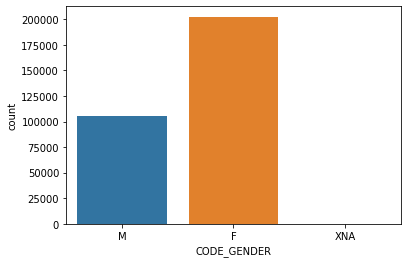

In [13]:
sn.countplot(application['CODE_GENDER'])

In [14]:
application.rename(columns={'CODE_GENDER':'gender'},inplace=True)

In [15]:
gender_enc=OneHotEncoder(drop='first',sparse=False)
gender_enc.fit(application[['gender']])
cols=list(np.array(gender_enc.categories_)[:,1:])
gender=pd.DataFrame(gender_enc.transform(application[['gender']]),columns=cols)
application=application.join(gender,on=application.index)
application.drop('gender',axis=1,inplace=True)

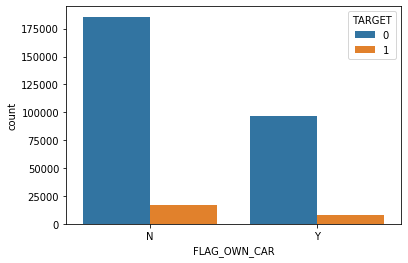

In [16]:
sn.countplot(application.FLAG_OWN_CAR,hue=application['TARGET'])

In [17]:
application['FLAG_OWN_REALTY']=application['FLAG_OWN_CAR'].apply(lambda x:'car_yes' if x=='Y' else 'car_no')

In [18]:
CAR_enc=OneHotEncoder(drop='first',sparse=False)
CAR_enc.fit(application[['FLAG_OWN_CAR']])
cols=list(np.array(CAR_enc.categories_)[:,1:])
CAR=pd.DataFrame(CAR_enc.transform(application[['FLAG_OWN_CAR']]),columns=cols)
application=application.join(CAR,on=application.index)
application.drop('FLAG_OWN_CAR',axis=1,inplace=True)

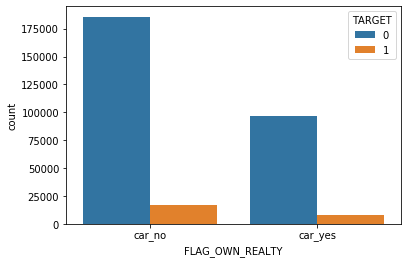

In [19]:
sn.countplot(application.FLAG_OWN_REALTY,hue=application['TARGET'])

In [20]:
application['FLAG_OWN_REALTY']=application['FLAG_OWN_REALTY'].apply(lambda x:'realty_yes' if x=='Y' else 'realty_no')

In [21]:
REAL_enc=OneHotEncoder(drop='first',sparse=False)
REAL_enc.fit(application[['FLAG_OWN_REALTY']])
cols=list(np.array(REAL_enc.categories_)[:,1:])
REAL=pd.DataFrame(REAL_enc.transform(application[['FLAG_OWN_REALTY']]),columns=cols)
application=application.join(REAL,on=application.index)
application.drop('FLAG_OWN_REALTY',axis=1,inplace=True)

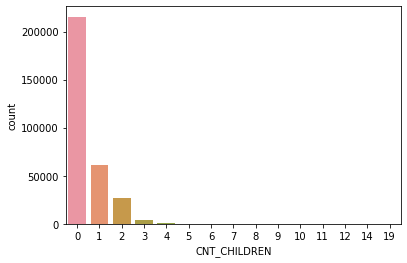

In [22]:
sn.countplot(application.CNT_CHILDREN)

In [23]:
application['CNT_CHILDREN'].value_counts()/application.shape[0]

0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
19    0.000007
12    0.000007
10    0.000007
9     0.000007
8     0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64

very low freq categories it has. If we use onehot it crates to sparse matrix.
If we use freq encoding we will have ovrlapping. So, better way to represent is by creating new label called having_more_children and ombining low catgory into it

In [24]:
application['CNT_CHILDREN']=application['CNT_CHILDREN'].apply(lambda x: x if x<3 else 'children>=3')

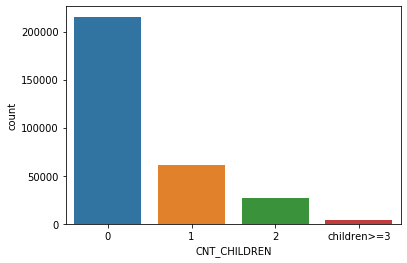

In [25]:
sn.countplot(application['CNT_CHILDREN'])

In [26]:
def make_child_cat(x):
    if x==0:
        return '0_child'
    if x==1:
        return '1_child'
    if x==2:
        return '2_child'
    else:
        return x
application['CNT_CHILDREN']=application['CNT_CHILDREN'].apply(make_child_cat)

In [27]:
CHILD_enc=OneHotEncoder(drop='first',sparse=False)
CHILD_enc.fit(application[['CNT_CHILDREN']])
cols=list(np.array(CHILD_enc.categories_)[:,1:])
CHILD=pd.DataFrame(CHILD_enc.transform(application[['CNT_CHILDREN']]),columns=cols)
application=application.join(CHILD,on=application.index)
application.drop('CNT_CHILDREN',axis=1,inplace=True)

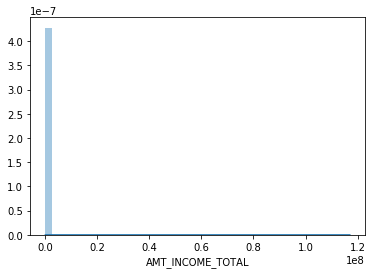

In [28]:
sn.distplot(application['AMT_INCOME_TOTAL'])


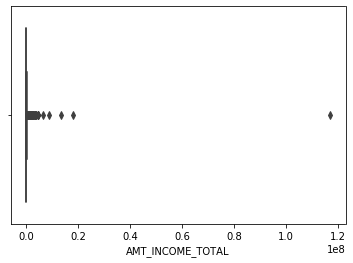

In [29]:
sn.boxplot(application['AMT_INCOME_TOTAL'])

In [30]:
application['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

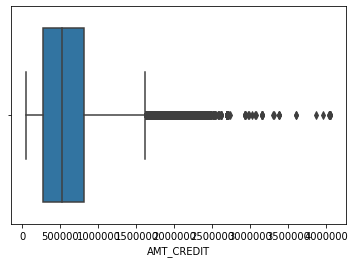

In [31]:
sn.boxplot(application['AMT_CREDIT'])

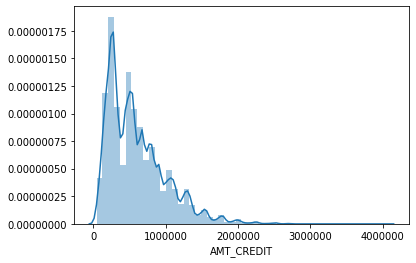

In [32]:
sn.distplot(application['AMT_CREDIT'])

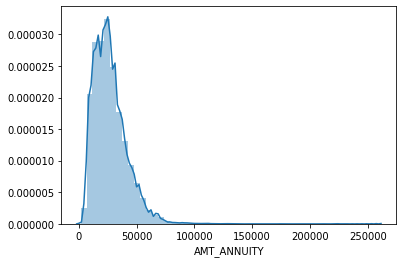

In [33]:
sn.distplot(application['AMT_ANNUITY'])

lets remove multicollinearity

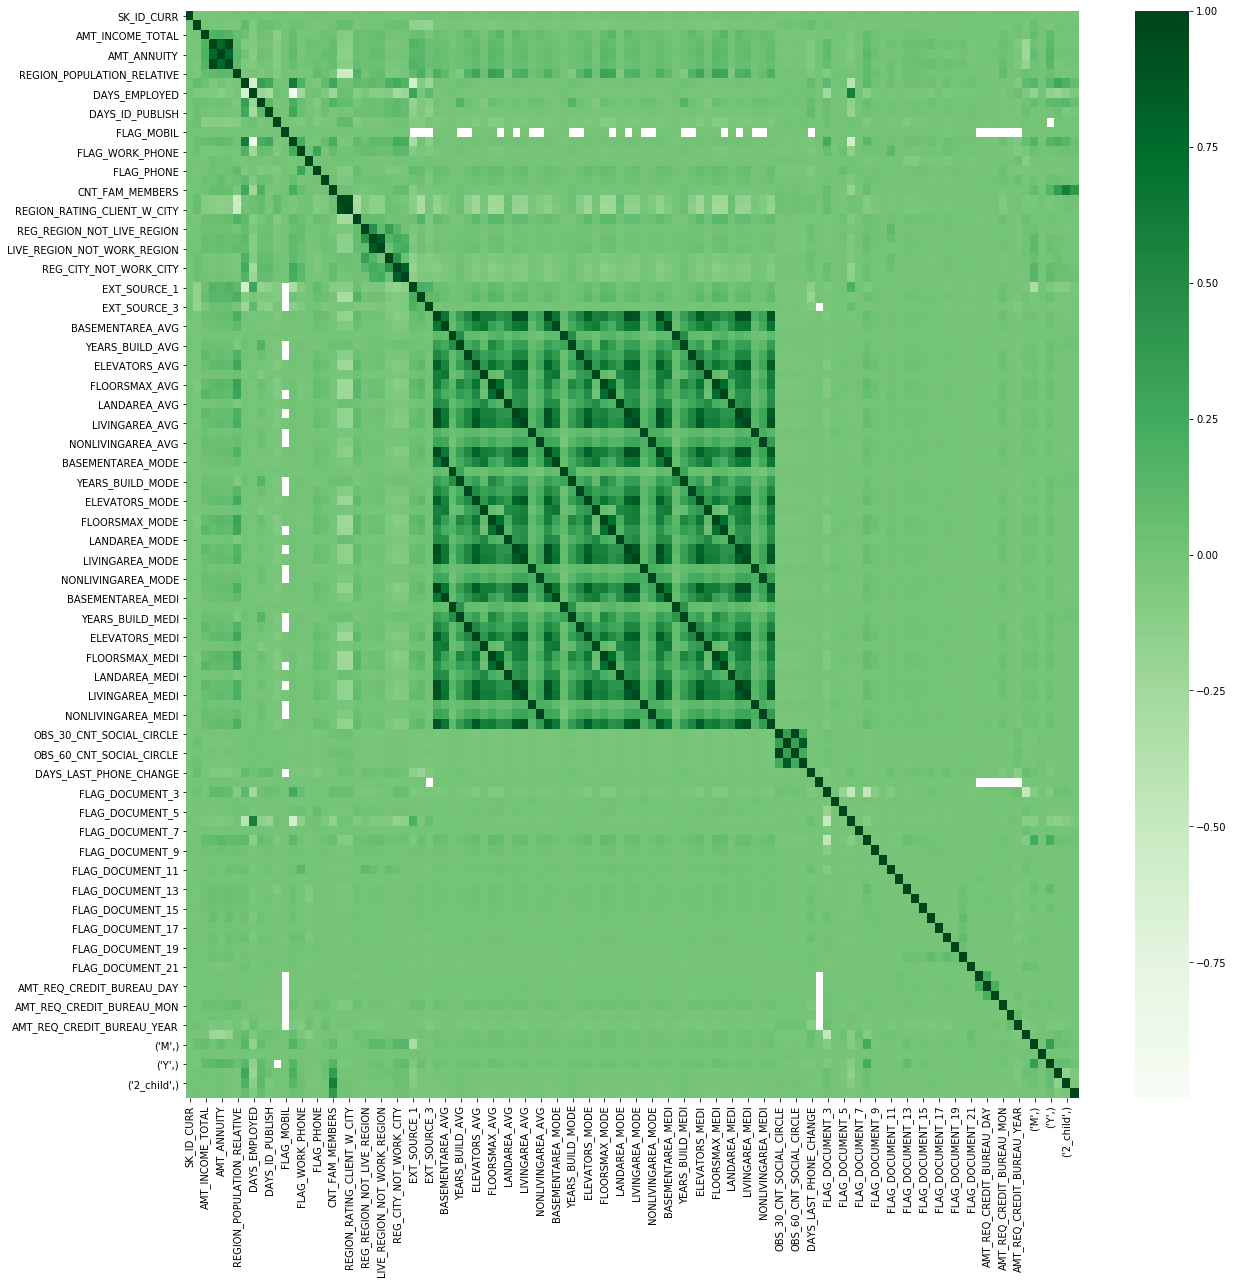

In [34]:
plt.figure(figsize=(20,20))
sn.heatmap(application.corr(),cmap='Greens')

In [35]:
application.drop('SK_ID_CURR',inplace=True,axis=1)

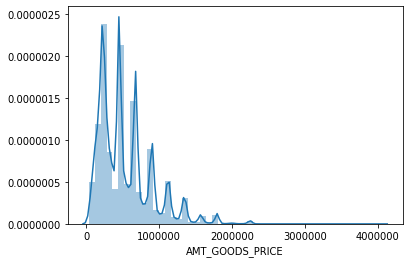

In [36]:
sn.distplot(application['AMT_GOODS_PRICE'])

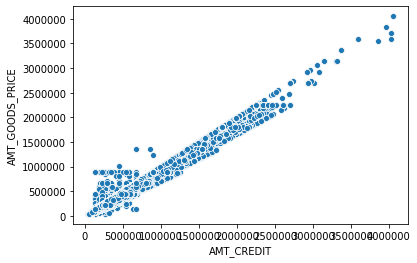

In [37]:
sn.scatterplot(application['AMT_CREDIT'],application['AMT_GOODS_PRICE'])

they are very hihly correlated this leds to multicollinearity

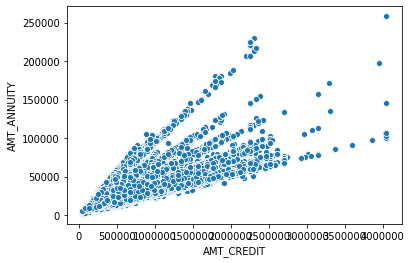

In [38]:
sn.scatterplot(application['AMT_CREDIT'],application['AMT_ANNUITY'])

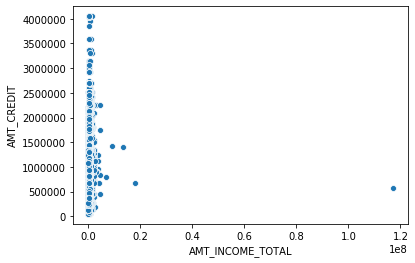

In [39]:
sn.scatterplot(application['AMT_INCOME_TOTAL'],application['AMT_CREDIT'])

In [40]:
application.drop(['AMT_ANNUITY','AMT_GOODS_PRICE'],axis=1,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

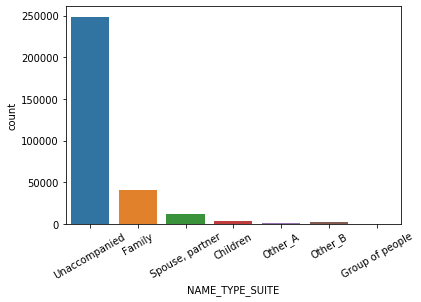

In [41]:
sn.countplot(application['NAME_TYPE_SUITE'])
plt.xticks(rotation=30)

In [42]:
application['NAME_TYPE_SUITE'].isna().sum()/application.shape[0]

0.004201475719567756

As the missing values are less than 5% we can simply fill them by frequent category. Because, it doesn't change the distribuion very much.

In [43]:
application['NAME_TYPE_SUITE'].fillna(value='Unaccompanied',inplace=True)

In [44]:
SUITE_enc=OneHotEncoder(drop='first',sparse=False)
SUITE_enc.fit(application[['NAME_TYPE_SUITE']])
cols=list(np.array(SUITE_enc.categories_)[:,1:])
SUITE=pd.DataFrame(SUITE_enc.transform(application[['NAME_TYPE_SUITE']]),columns=cols)
application=application.join(SUITE,on=application.index)
application.drop('NAME_TYPE_SUITE',axis=1,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

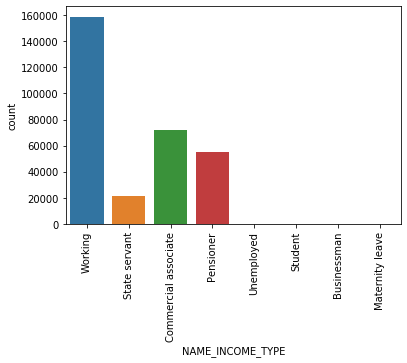

In [45]:
sn.countplot(application['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)

we can see that last categories are very very rare.So, lets combine

In [46]:
application['NAME_INCOME_TYPE']=application['NAME_INCOME_TYPE'].apply(lambda x:x if (x!='Unemployed' and x!='Student' and x!='Businessman' and x!='Maternity leave') else 'other_way_income')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

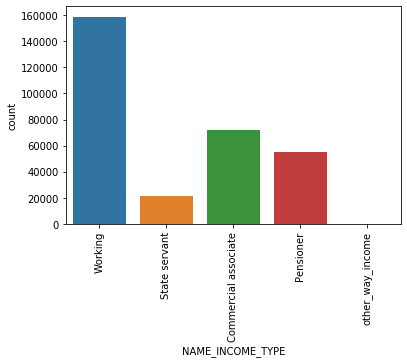

In [47]:
sn.countplot(application['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)

In [48]:
INTYPE_enc=OneHotEncoder(drop='first',sparse=False)
INTYPE_enc.fit(application[['NAME_INCOME_TYPE']])
cols=list(np.array(INTYPE_enc.categories_)[:,1:])
INTYPE=pd.DataFrame(INTYPE_enc.transform(application[['NAME_INCOME_TYPE']]),columns=cols)
application=application.join(INTYPE,on=application.index)
application.drop('NAME_INCOME_TYPE',axis=1,inplace=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

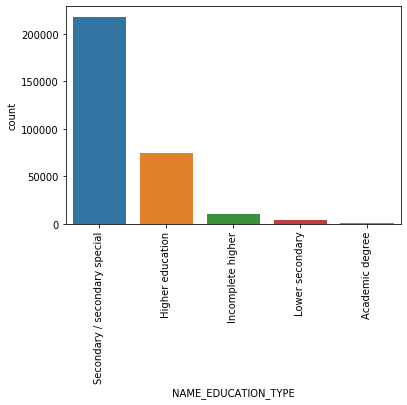

In [49]:
sn.countplot(application['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)

In [50]:
EDU_enc=OneHotEncoder(drop='first',sparse=False)
EDU_enc.fit(application[['NAME_EDUCATION_TYPE']])
cols=list(np.array(EDU_enc.categories_)[:,1:])
EDU=pd.DataFrame(EDU_enc.transform(application[['NAME_EDUCATION_TYPE']]),columns=cols)
application=application.join(EDU,on=application.index)
application.drop('NAME_EDUCATION_TYPE',axis=1,inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

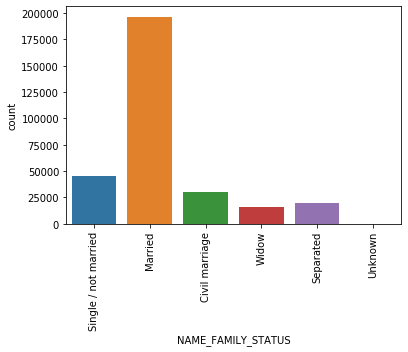

In [51]:
sn.countplot(application['NAME_FAMILY_STATUS'])
plt.xticks(rotation=90)

In [52]:
FAM_enc=OneHotEncoder(drop='first',sparse=False)
FAM_enc.fit(application[['NAME_FAMILY_STATUS']])
cols=list(np.array(FAM_enc.categories_)[:,1:])
FAM=pd.DataFrame(FAM_enc.transform(application[['NAME_FAMILY_STATUS']]),columns=cols)
application=application.join(FAM,on=application.index)
application.drop('NAME_FAMILY_STATUS',axis=1,inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

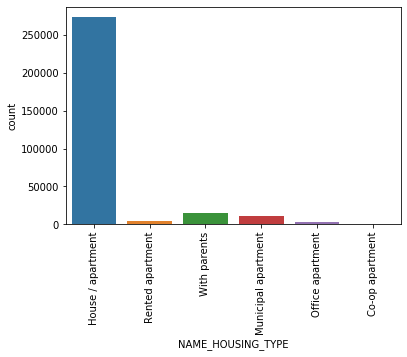

In [53]:
sn.countplot(application['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)

In [54]:
hou_enc=OneHotEncoder(drop='first',sparse=False)
hou_enc.fit(application[['NAME_HOUSING_TYPE']])
cols=list(np.array(hou_enc.categories_)[:,1:])
hou=pd.DataFrame(hou_enc.transform(application[['NAME_HOUSING_TYPE']]),columns=cols)
application=application.join(hou,on=application.index)
application.drop('NAME_HOUSING_TYPE',axis=1,inplace=True)

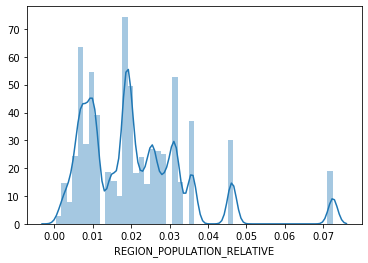

In [55]:
sn.distplot(application['REGION_POPULATION_RELATIVE'])

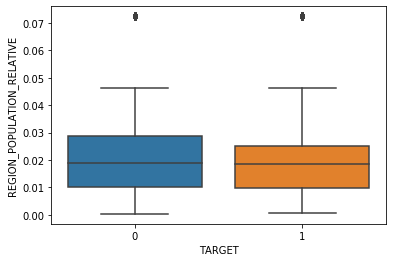

In [56]:
sn.boxplot(application['TARGET'],application['REGION_POPULATION_RELATIVE'])

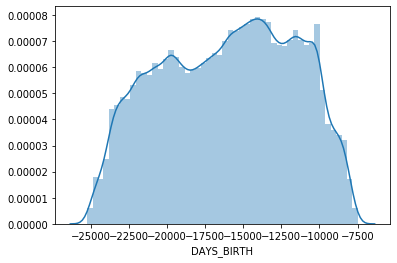

In [57]:
sn.distplot(application['DAYS_BIRTH'])

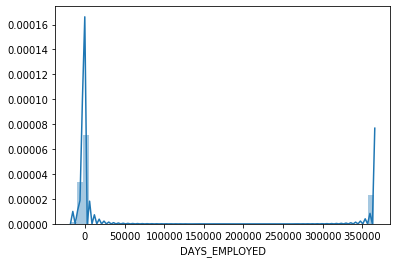

In [58]:
sn.distplot(application['DAYS_EMPLOYED'])

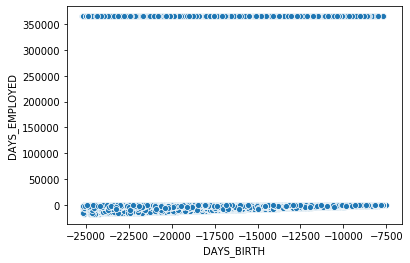

In [59]:
sn.scatterplot('DAYS_BIRTH','DAYS_EMPLOYED',data=application)

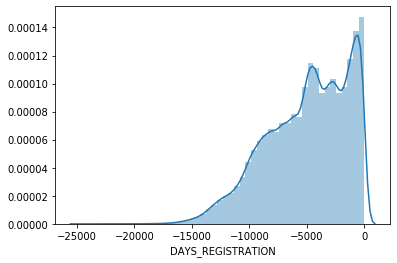

In [60]:
sn.distplot(application['DAYS_REGISTRATION'])

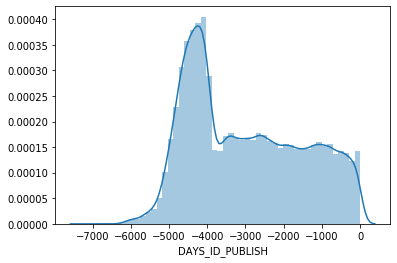

In [61]:
sn.distplot(application['DAYS_ID_PUBLISH'])

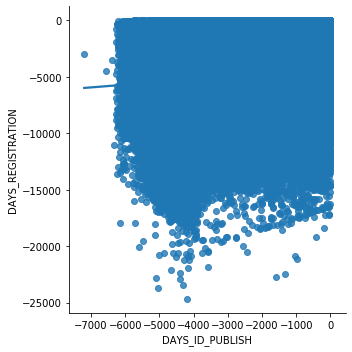

In [62]:
sn.lmplot('DAYS_ID_PUBLISH','DAYS_REGISTRATION',data=application)

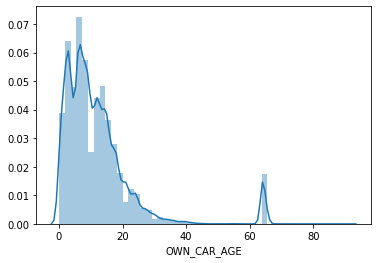

In [63]:
sn.distplot(application['OWN_CAR_AGE'])

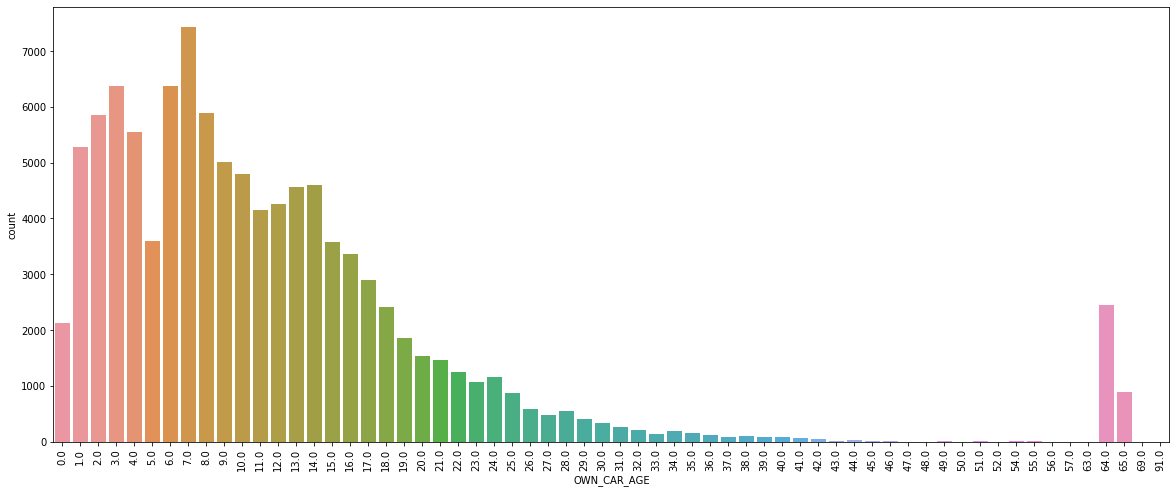

In [64]:
plt.figure(figsize=(20,8))
sn.countplot(application['OWN_CAR_AGE'])
plt.xticks(rotation=90)
plt.show()

In [65]:
application['OWN_CAR_AGE'].isna().sum()/application.shape[0]

0.6599081008484249

more than 50% of data is missing we can't impute any value because it will change the distribution
So,its better to remv the field

In [66]:
application.drop('OWN_CAR_AGE',axis=1,inplace=True)

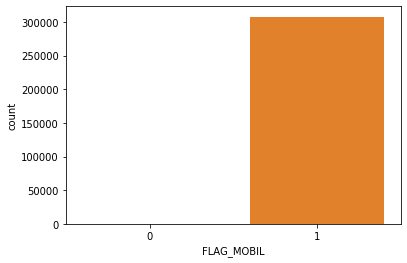

In [67]:
sn.countplot(application['FLAG_MOBIL'])

In [68]:

application['FLAG_MOBIL'].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

its better to remove this feld because its having just one category throughout the data

In [69]:
application.drop("FLAG_MOBIL",axis=1,inplace=True)

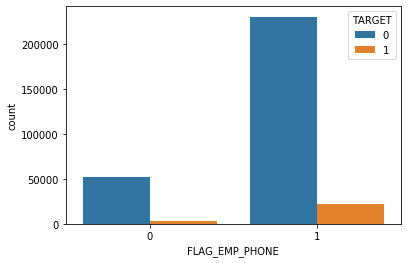

In [70]:
sn.countplot(application['FLAG_EMP_PHONE'],hue=application['TARGET'])

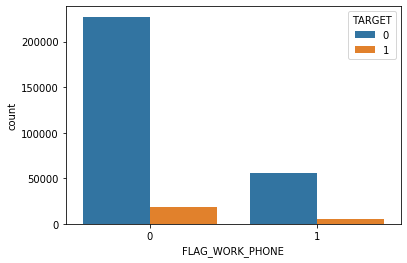

In [71]:
sn.countplot(application['FLAG_WORK_PHONE'],hue=application['TARGET'])

In [72]:
application['FLAG_CONT_MOBILE'].value_counts()/application.shape[0]

1    0.998133
0    0.001867
Name: FLAG_CONT_MOBILE, dtype: float64

this features no need to have they don't mak any variationin target as the 1's are more than 99% if we keep it model model will get internally biased towards this 1 in this field.It don't improve the performance of the model

In [73]:
application.drop('FLAG_CONT_MOBILE',axis=1,inplace=True)

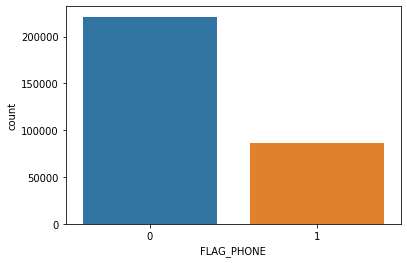

In [74]:
sn.countplot(application['FLAG_PHONE'])

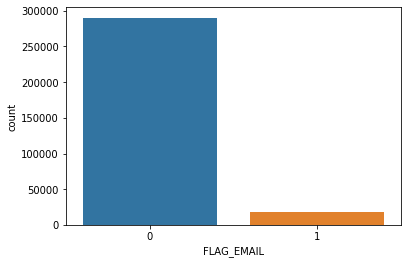

In [75]:
sn.countplot(application['FLAG_EMAIL'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

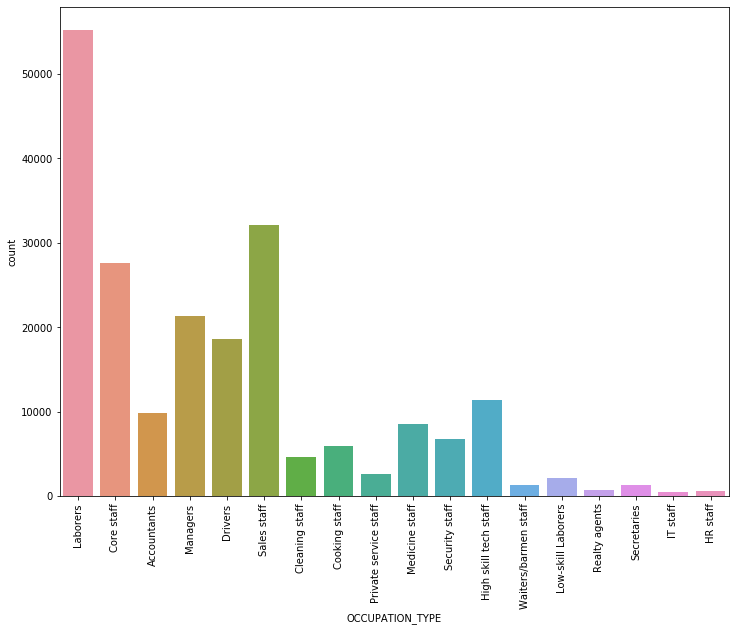

In [76]:
plt.figure(figsize=(12,9))
sn.countplot(application['OCCUPATION_TYPE'])
plt.xticks(rotation=90)

In [77]:
data=pd.DataFrame(application['OCCUPATION_TYPE'].value_counts()/application.shape[0])

In [78]:
data.sort_values('OCCUPATION_TYPE',ascending=False,inplace=True)

In [79]:
data.reset_index(inplace=True)

In [80]:
data

,index,OCCUPATION_TYPE
0,Laborers,0.179460
1,Sales staff,0.104393
2,Core staff,0.089655
3,Managers,0.069497
4,Drivers,0.060495
5,High skill tech staff,0.037007
6,Accountants,0.031911
7,Medicine staff,0.027762
8,Security staff,0.021856
9,Cooking staff,0.019336


In [81]:
data['cat']=data.apply(lambda x:x['index'] if x['OCCUPATION_TYPE']>0.01 else 'other_occupation',axis=1)

In [82]:
data

,index,OCCUPATION_TYPE,cat
0,Laborers,0.179460,Laborers
1,Sales staff,0.104393,Sales staff
2,Core staff,0.089655,Core staff
3,Managers,0.069497,Managers
4,Drivers,0.060495,Drivers
5,High skill tech staff,0.037007,High skill tech staff
6,Accountants,0.031911,Accountants
7,Medicine staff,0.027762,Medicine staff
8,Security staff,0.021856,Security staff
9,Cooking staff,0.019336,Cooking staff


In [83]:
occ_dict={}
index=list(data['index'])
cat=list(data['cat'])
for i in range(len(index)):
    occ_dict[index[i]]=cat[i]

In [84]:
occ_dict

{'Laborers': 'Laborers',
 'Sales staff': 'Sales staff',
 'Core staff': 'Core staff',
 'Managers': 'Managers',
 'Drivers': 'Drivers',
 'High skill tech staff': 'High skill tech staff',
 'Accountants': 'Accountants',
 'Medicine staff': 'Medicine staff',
 'Security staff': 'Security staff',
 'Cooking staff': 'Cooking staff',
 'Cleaning staff': 'Cleaning staff',
 'Private service staff': 'other_occupation',
 'Low-skill Laborers': 'other_occupation',
 'Waiters/barmen staff': 'other_occupation',
 'Secretaries': 'other_occupation',
 'Realty agents': 'other_occupation',
 'HR staff': 'other_occupation',
 'IT staff': 'other_occupation'}

In [85]:
application['OCCUPATION_TYPE']=application['OCCUPATION_TYPE'].map(occ_dict)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

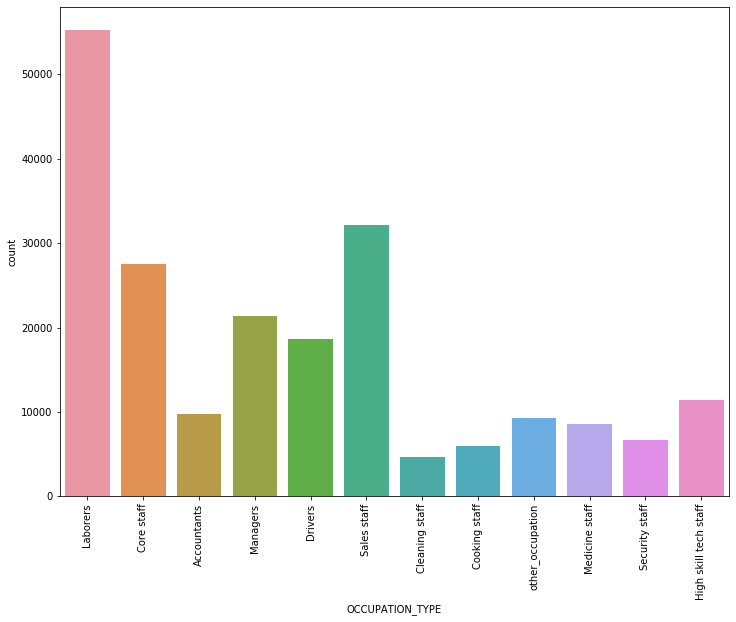

In [86]:
plt.figure(figsize=(12,9))
sn.countplot(application['OCCUPATION_TYPE'])
plt.xticks(rotation=90)

In [87]:
application['OCCUPATION_TYPE'].isna().sum()/application.shape[0]

0.31345545362604915

31% of data is missing ifw simply replace by mode then higher value will become even more.So, lets make new category called missing_occupation

In [88]:
application['OCCUPATION_TYPE'].fillna(value='missing_occpation',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

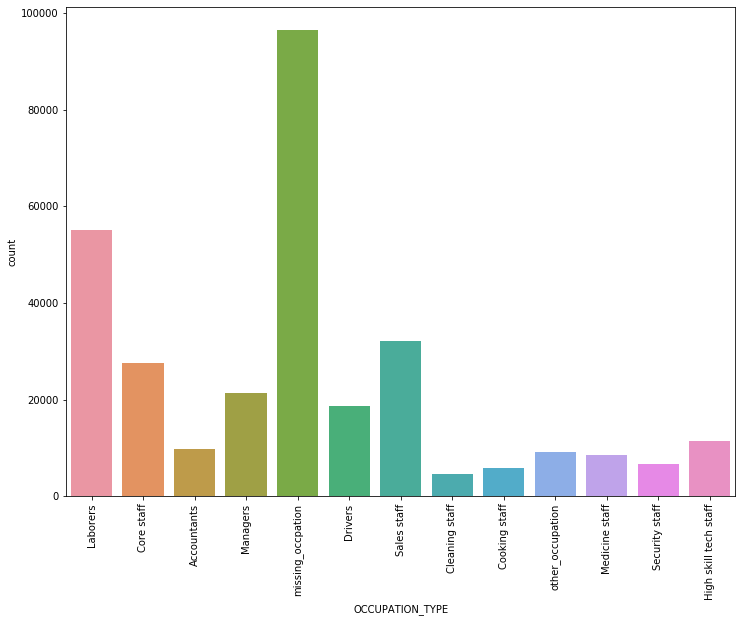

In [89]:
plt.figure(figsize=(12,9))
sn.countplot(application['OCCUPATION_TYPE'])
plt.xticks(rotation=90)

In [90]:
occ_enc=OneHotEncoder(drop='first',sparse=False)
occ_enc.fit(application[['OCCUPATION_TYPE']])
cols=list(np.array(occ_enc.categories_)[:,1:])
occ=pd.DataFrame(occ_enc.transform(application[['OCCUPATION_TYPE']]),columns=cols)
application=application.join(occ,on=application.index)
application.drop('OCCUPATION_TYPE',axis=1,inplace=True)

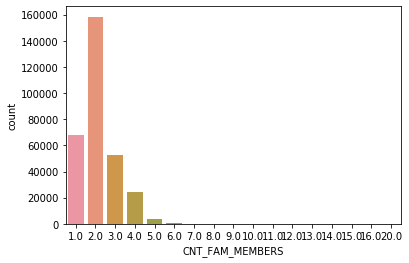

In [91]:
sn.countplot(application['CNT_FAM_MEMBERS'])

In [92]:

application['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [93]:
application['CNT_FAM_MEMBERS'].fillna(value=2,inplace=True)

In [94]:
application['CNT_FAM_MEMBERS']=application['CNT_FAM_MEMBERS'].apply(lambda x:x if x<5 else 'big_family')

In [95]:
application['CNT_FAM_MEMBERS']=application['CNT_FAM_MEMBERS'].apply(lambda x:str(x)+'member' if type(x)!=str else x)

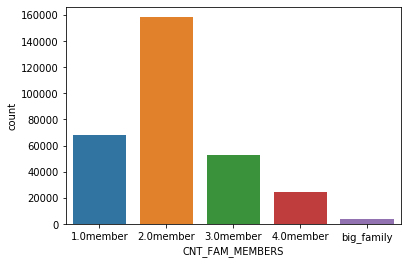

In [96]:
sn.countplot(application['CNT_FAM_MEMBERS'])

In [97]:
cf_enc=OneHotEncoder(drop='first',sparse=False)
cf_enc.fit(application[['CNT_FAM_MEMBERS']])
cols=list(np.array(cf_enc.categories_)[:,1:])
cf=pd.DataFrame(cf_enc.transform(application[['CNT_FAM_MEMBERS']]),columns=cols)
application=application.join(cf,on=application.index)
application.drop('CNT_FAM_MEMBERS',axis=1,inplace=True)

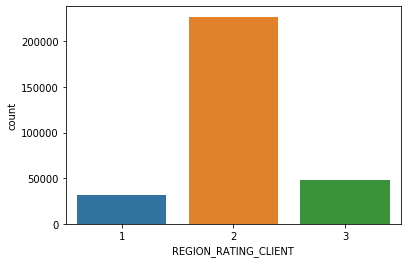

In [98]:
sn.countplot(application['REGION_RATING_CLIENT'])

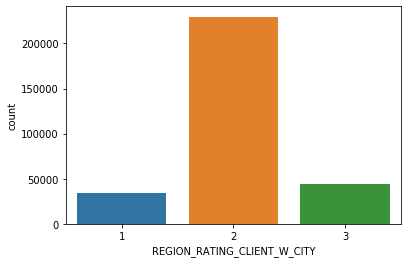

In [99]:
sn.countplot(application['REGION_RATING_CLIENT_W_CITY'])

In [100]:
application.drop('REGION_RATING_CLIENT_W_CITY',axis=1,inplace=True)

In [101]:
application['WEEKDAY_APPR_PROCESS_START'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

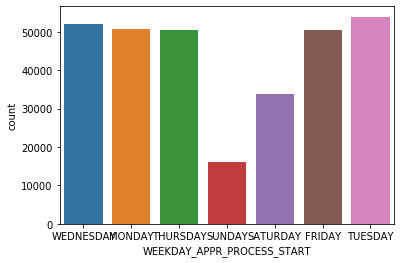

In [102]:
sn.countplot(application['WEEKDAY_APPR_PROCESS_START'])

In [103]:
week_dict={'SUNDAY':0,'MONDAY':1,'TUESDAY':2,'WEDNESDAY':3,'THURSDAY':4,'FRIDAY':5,'SATURDAY':6}
application['WEEKDAY_APPR_PROCESS_START']=application['WEEKDAY_APPR_PROCESS_START'].map(week_dict)

In [104]:
application['sin_week_process']=application['WEEKDAY_APPR_PROCESS_START'].apply(lambda x:np.sin(2*np.pi*x/6))
application['cos_week_process']=application['WEEKDAY_APPR_PROCESS_START'].apply(lambda x:np.cos(2*np.pi*x/6))
application.drop('WEEKDAY_APPR_PROCESS_START',inplace=True,axis=1)

In [105]:
application
application['sin_hour_process']=application['HOUR_APPR_PROCESS_START'].apply(lambda x:np.sin(2*np.pi*x/23))
application['cos_hour_process']=application['HOUR_APPR_PROCESS_START'].apply(lambda x:np.cos(2*np.pi*x/23))
application.drop('HOUR_APPR_PROCESS_START',inplace=True,axis=1)

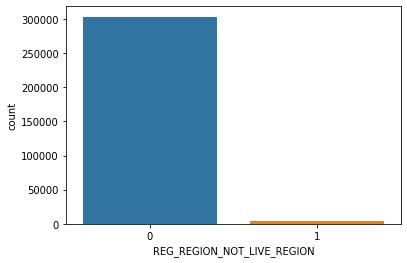

In [106]:
sn.countplot(application['REG_REGION_NOT_LIVE_REGION'])

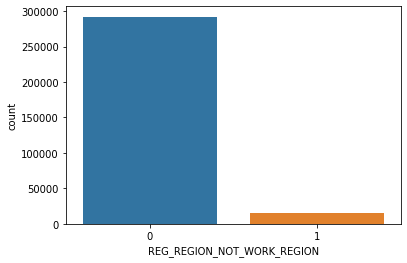

In [107]:
sn.countplot(application['REG_REGION_NOT_WORK_REGION'])

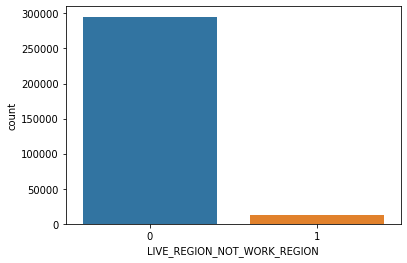

In [108]:
sn.countplot(application['LIVE_REGION_NOT_WORK_REGION'])

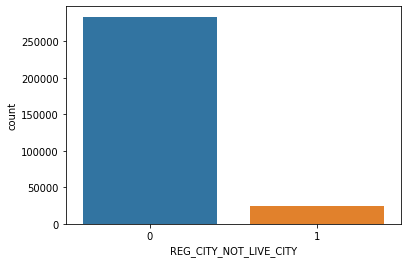

In [109]:
sn.countplot(application['REG_CITY_NOT_LIVE_CITY'])

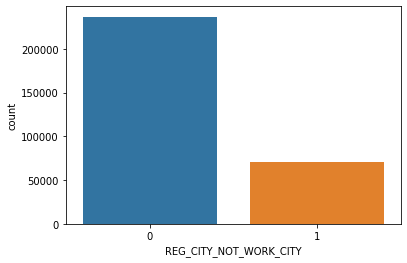

In [110]:
sn.countplot(application['REG_CITY_NOT_WORK_CITY'])

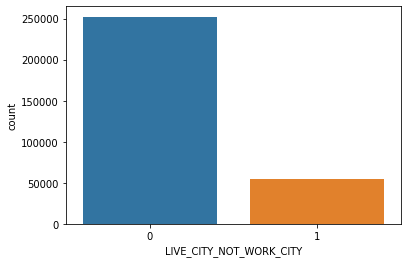

In [111]:
sn.countplot(application['LIVE_CITY_NOT_WORK_CITY'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text xticklabel objects>)

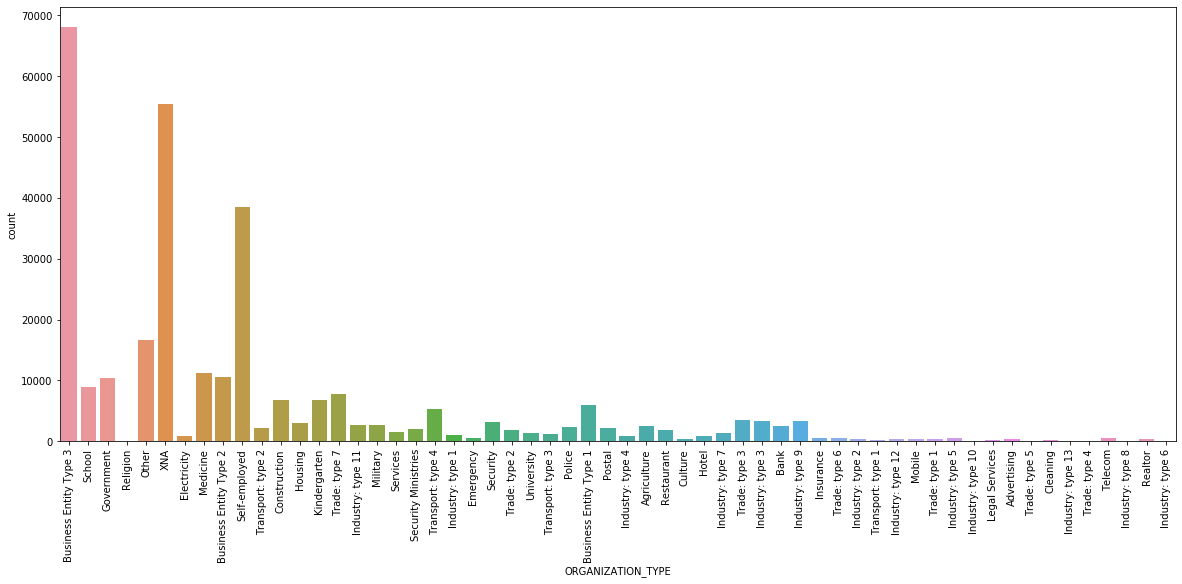

In [112]:
plt.figure(figsize=(20,8))
sn.countplot(application['ORGANIZATION_TYPE'])
plt.xticks(rotation=90)

In [113]:
application['ORGANIZATION_TYPE'].value_counts()/application.shape[0]

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [114]:
req_list=['Business Entity Type 3'  
          ,'XNA'                     
          ,'Self-employed'           
          ,'Other'                   
          ,'Medicine'                
          ,'Business Entity Type 2'  
          ,'Government'              
          ,'School'                  
          ,'Trade: type 7'           
          ,'Kindergarten'            
          ,'Construction']           

In [115]:
application['ORGANIZATION_TYPE']=application['ORGANIZATION_TYPE'].apply(lambda x: 'rare_organisation' if x not in req_list else x)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

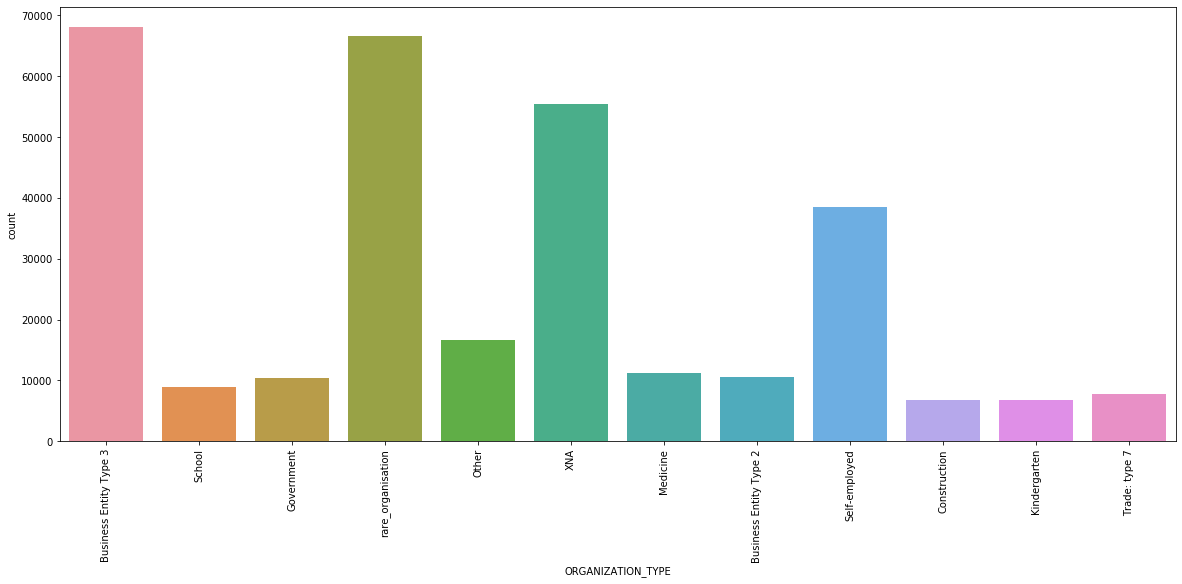

In [116]:
plt.figure(figsize=(20,8))
sn.countplot(application['ORGANIZATION_TYPE'])
plt.xticks(rotation=90)

In [117]:
application['ORGANIZATION_TYPE']=application['ORGANIZATION_TYPE'].apply(lambda x:x+'organisation')

In [118]:
org_enc=OneHotEncoder(drop='first',sparse=False)
org_enc.fit(application[['ORGANIZATION_TYPE']])
cols=list(np.array(org_enc.categories_)[:,1:])
org=pd.DataFrame(org_enc.transform(application[['ORGANIZATION_TYPE']]),columns=cols)
application=application.join(org,on=application.index)
application.drop('ORGANIZATION_TYPE',axis=1,inplace=True)

In [119]:
application['EXT_SOURCE_1'].isna().sum()/application.shape[0]

0.5638107254699832

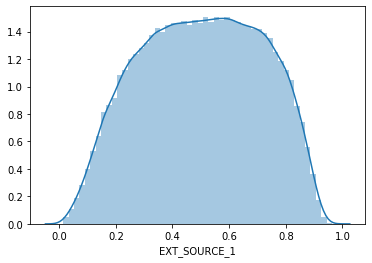

In [120]:
sn.distplot(application['EXT_SOURCE_1'])

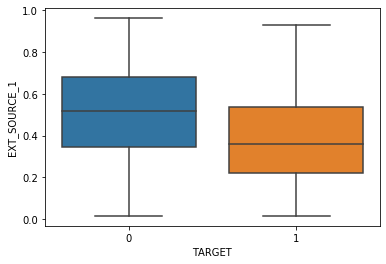

In [121]:
sn.boxplot(application['TARGET'],application['EXT_SOURCE_1'])

more than half off the data is missing.So, lets remove the feature

In [122]:
application.drop('EXT_SOURCE_1',axis=1,inplace=True)

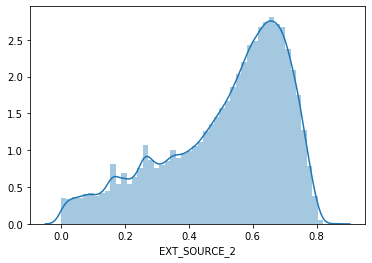

In [123]:
sn.distplot(application['EXT_SOURCE_2'])

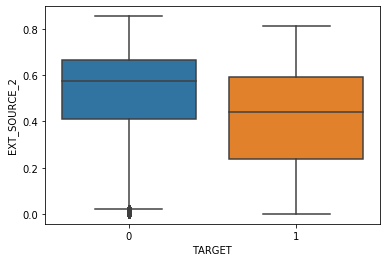

In [124]:
sn.boxplot(application['TARGET'],application['EXT_SOURCE_2'])

In [125]:
for i in range(application.shape[0]):
    if np.isnan(application.loc[i,'EXT_SOURCE_2']):
        if application.loc[i,'TARGET']==0:
            application.loc[i,'EXT_SOURCE_2']=0.58
        else:
            application.loc[i,'EXT_SOURCE_2']=0.4

In [126]:
application['EXT_SOURCE_3'].isna().sum()/application.shape[0]

0.19825307062186392

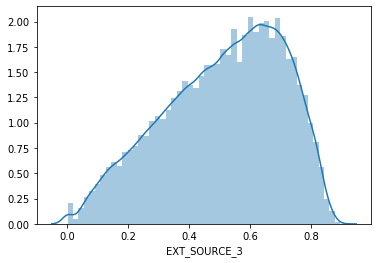

In [127]:
sn.distplot(application['EXT_SOURCE_3'])

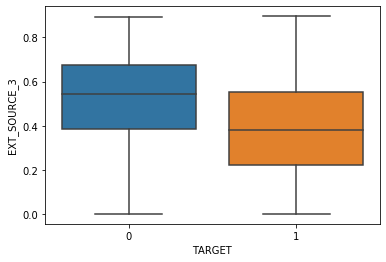

In [128]:
sn.boxplot(application['TARGET'],application['EXT_SOURCE_3'])

In [129]:
for i in range(application.shape[0]):
    if np.isnan(application.loc[i,'EXT_SOURCE_3']):
        if application.loc[i,'TARGET']==0:
            application.loc[i,'EXT_SOURCE_3']=0.58
        else:
            application.loc[i,'EXT_SOURCE_3']=0.4

<Figure size 864x864 with 0 Axes>

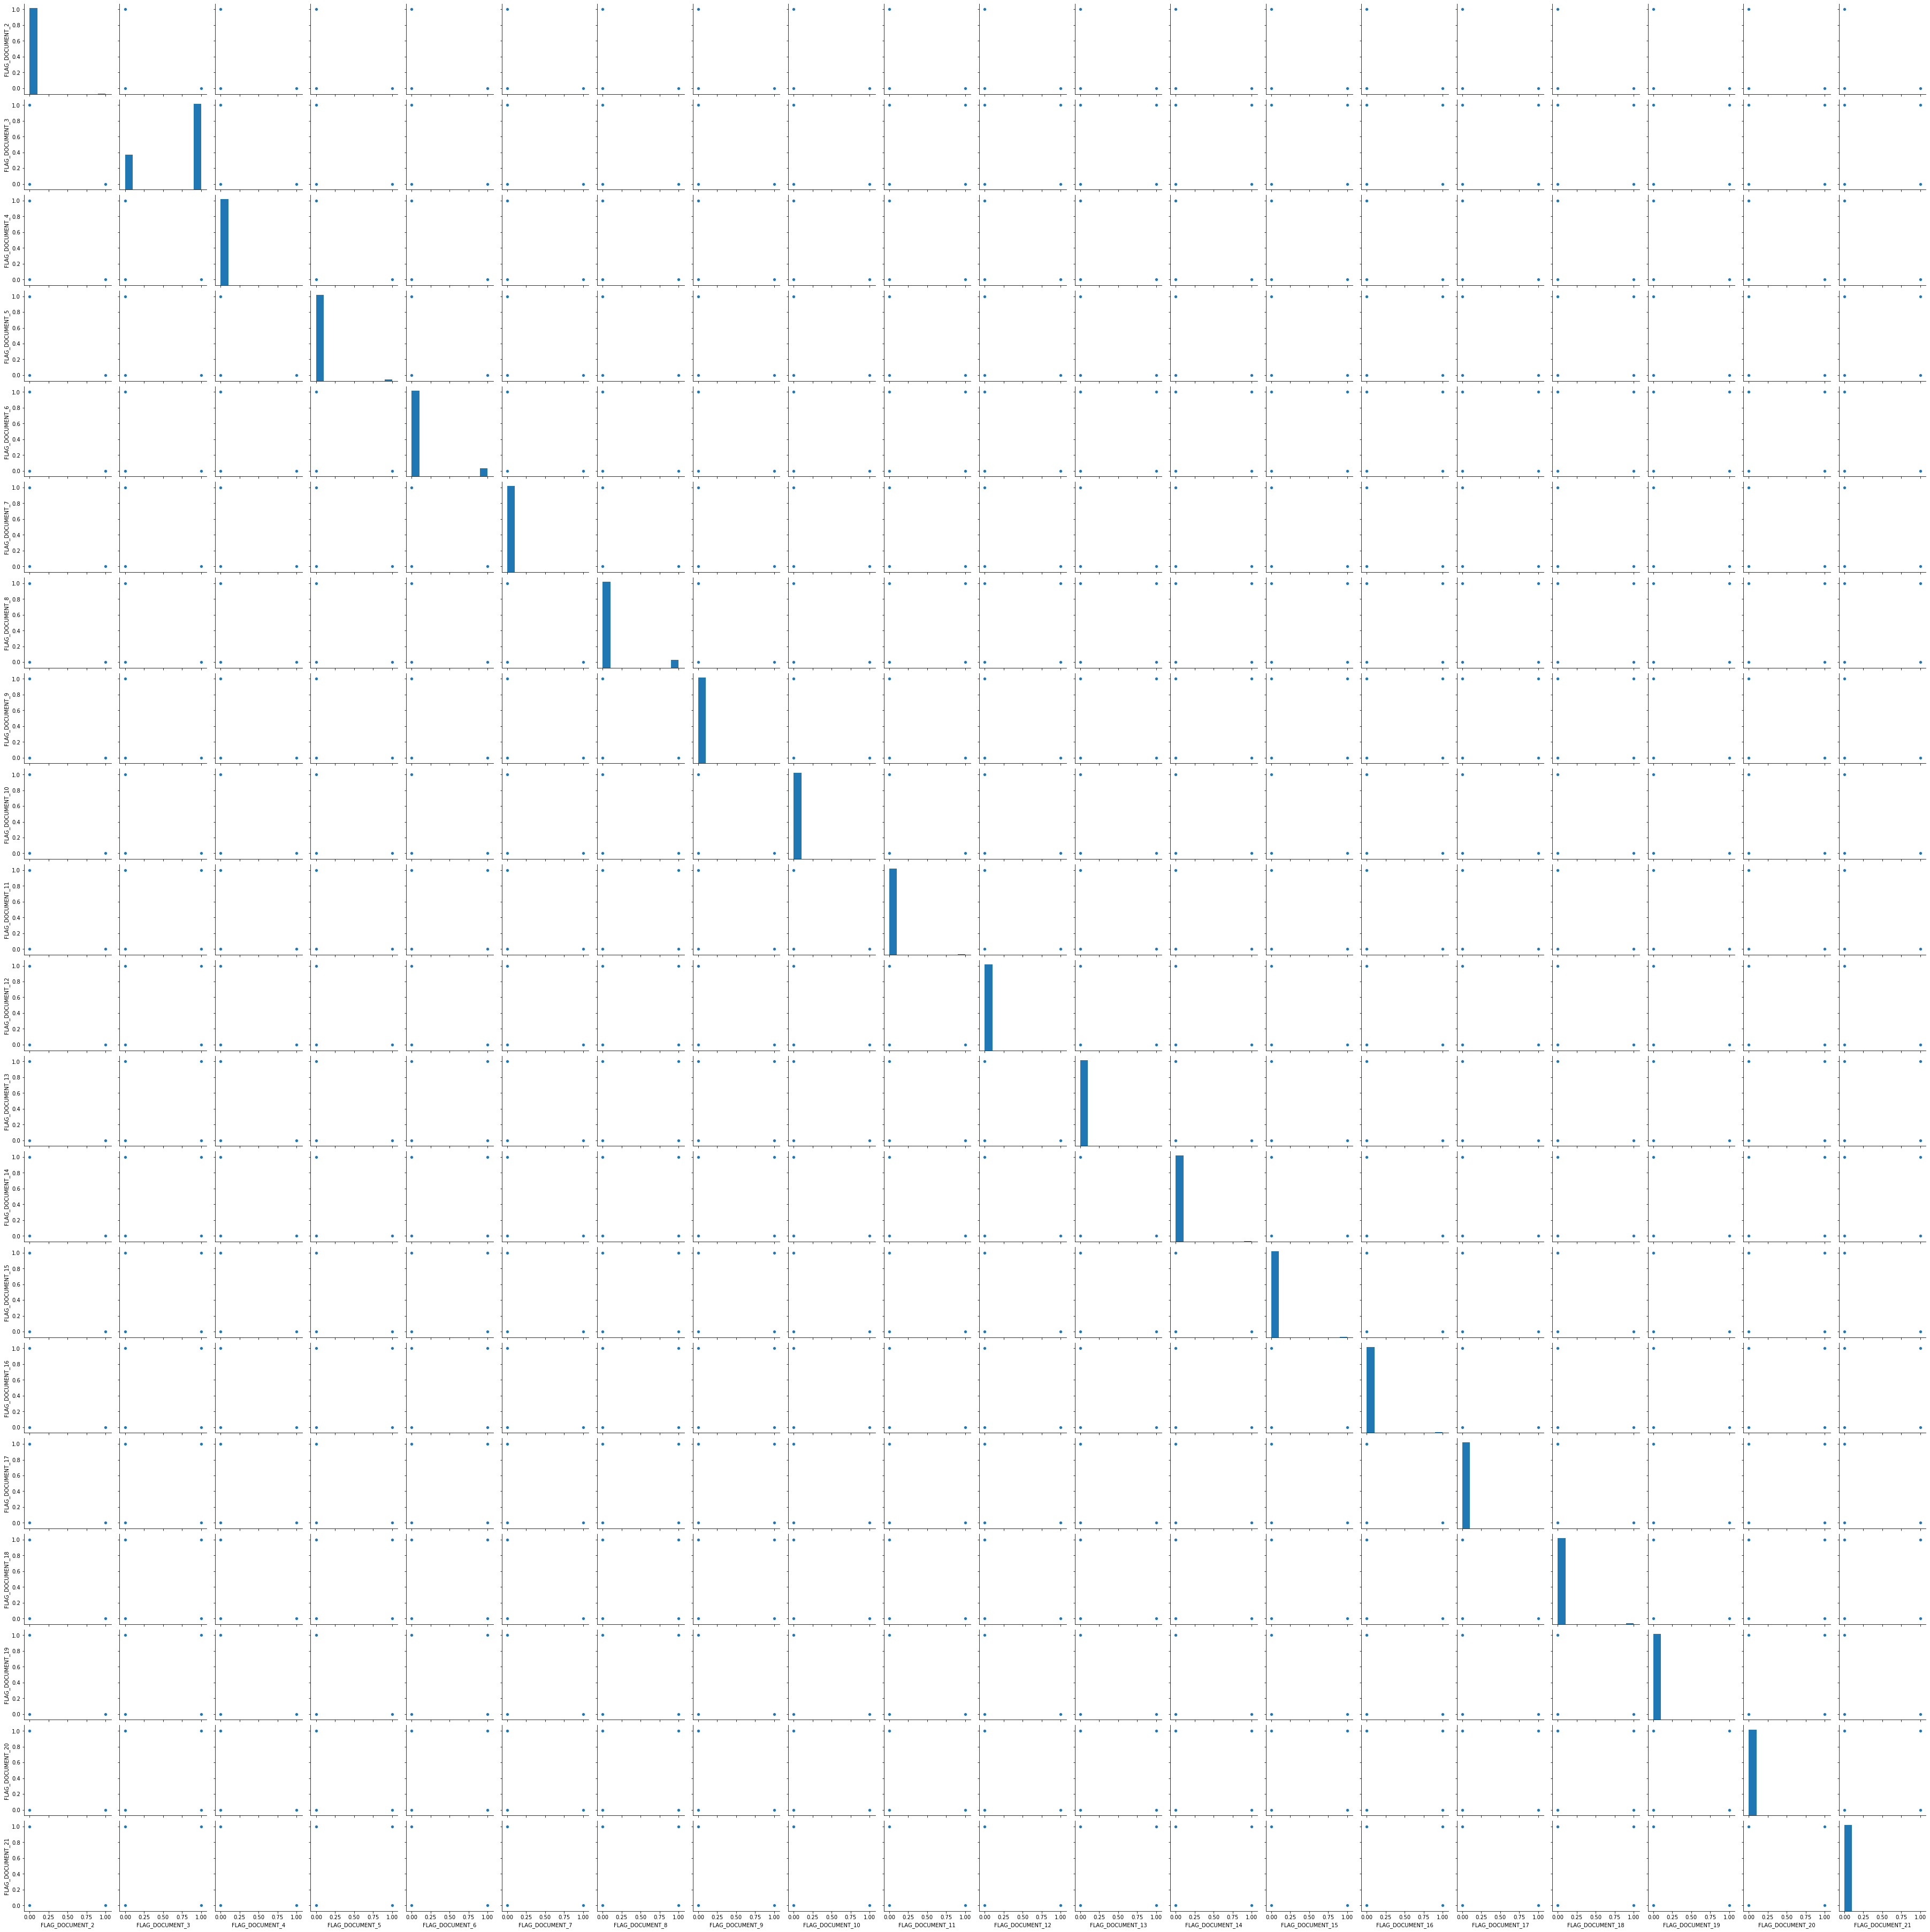

In [130]:
plt.figure(figsize=(12,12))
sn.pairplot(application[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']])

In [131]:
application['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()/application.shape[0]

0.0033202064316398437

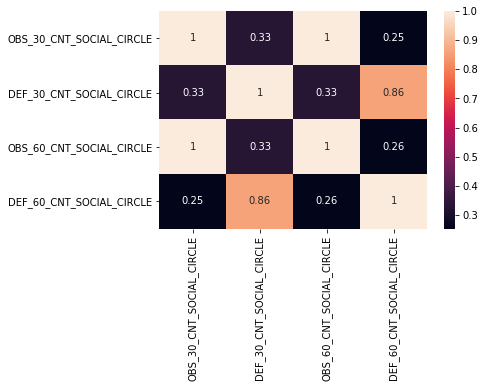

In [132]:
sn.heatmap(application[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].corr(),annot=True)

In [133]:
application.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

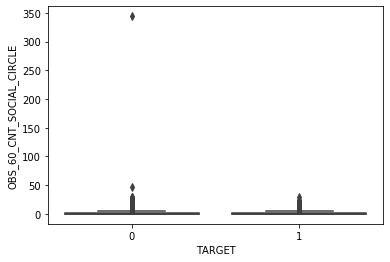

In [134]:
sn.boxplot(application['TARGET'],application['OBS_60_CNT_SOCIAL_CIRCLE'])

In [135]:
application['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [136]:
application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)

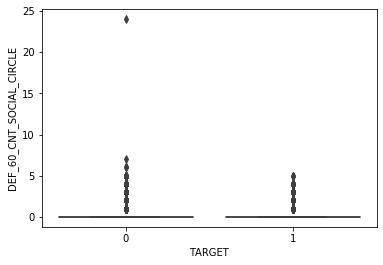

In [137]:
sn.boxplot(application['TARGET'],application['DEF_60_CNT_SOCIAL_CIRCLE'])

In [138]:
application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)

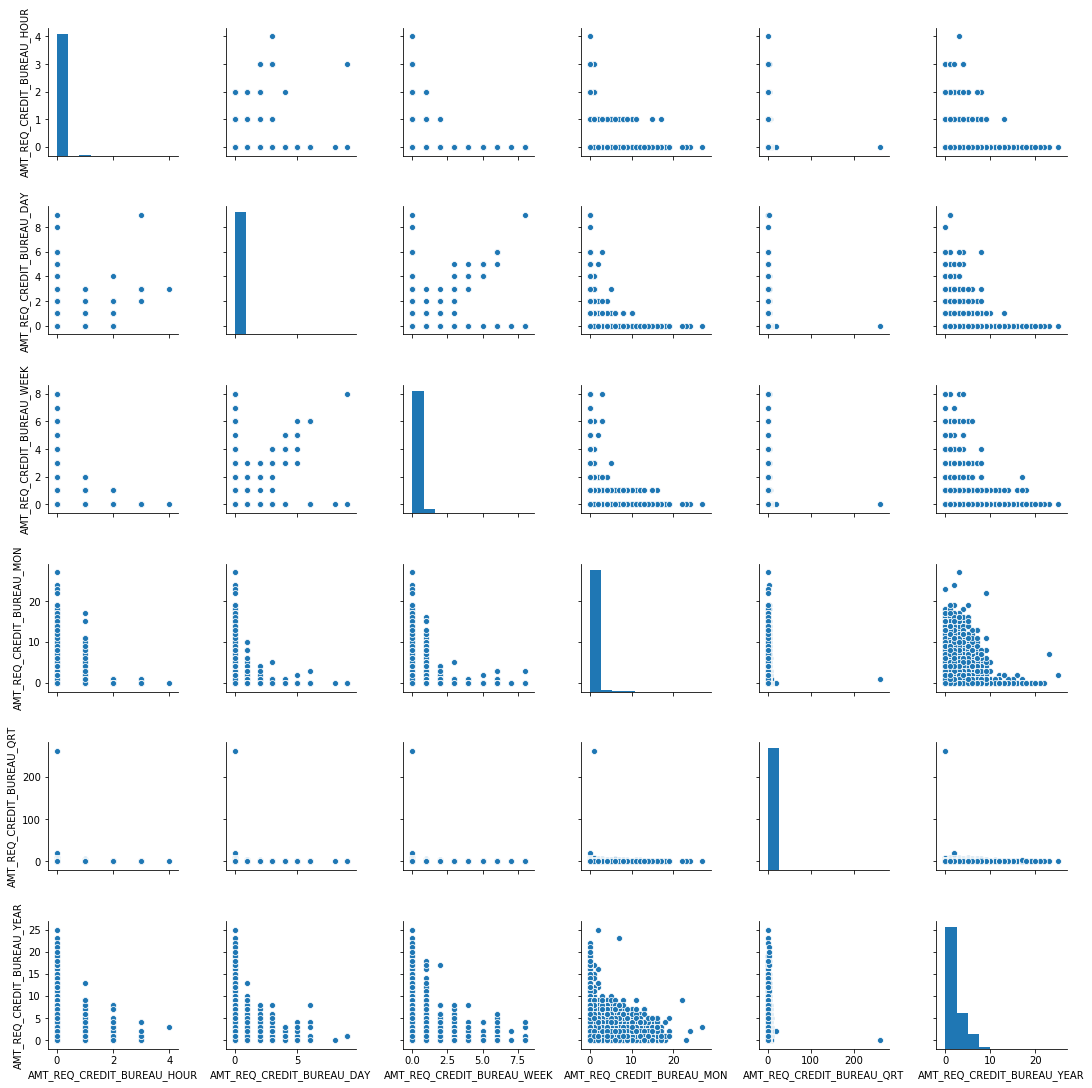

In [139]:
sn.pairplot(application[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']])

In [140]:
application['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()/application.shape[0]

0.13501630835970097

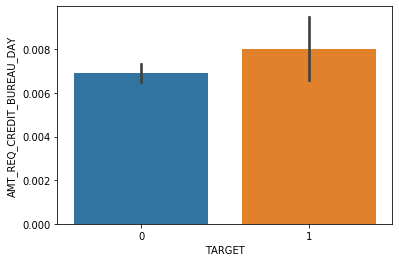

In [141]:
sn.barplot(application['TARGET'],application['AMT_REQ_CREDIT_BUREAU_DAY'])

In [142]:
for i in range(application.shape[0]):
    if np.isnan(application.loc[i,'AMT_REQ_CREDIT_BUREAU_DAY']):
        if application.loc[i,'TARGET']==0:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_DAY']=0.07
        else:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_DAY']=0.08

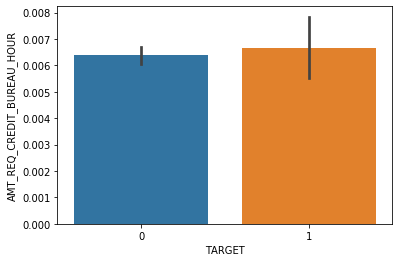

In [143]:
sn.barplot(application['TARGET'],application['AMT_REQ_CREDIT_BUREAU_HOUR'])

In [144]:
for i in range(application.shape[0]):
    if np.isnan(application.loc[i,'AMT_REQ_CREDIT_BUREAU_DAY']):
        if application.loc[i,'TARGET']==0:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_DAY']=0.65
        else:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_DAY']=0.07

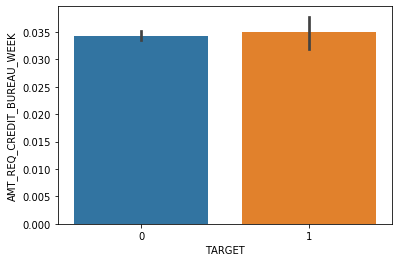

In [145]:
sn.barplot(application['TARGET'],application['AMT_REQ_CREDIT_BUREAU_WEEK'])

In [146]:
for i in range(application.shape[0]):
    if np.isnan(application.loc[i,'AMT_REQ_CREDIT_BUREAU_WEEK']):
        if application.loc[i,'TARGET']==0:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_WEEK']=0.035
        else:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_WEEK']=0.035

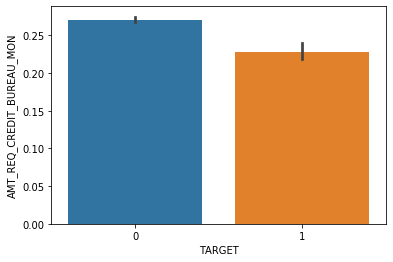

In [147]:
sn.barplot(application['TARGET'],application['AMT_REQ_CREDIT_BUREAU_MON'])

In [148]:
for i in range(application.shape[0]):
    if np.isnan(application.loc[i,'AMT_REQ_CREDIT_BUREAU_MON']):
        if application.loc[i,'TARGET']==0:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_MON']=0.27
        else:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_MON']=0.22

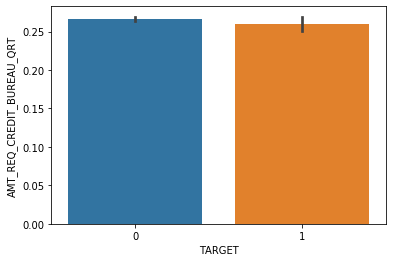

In [149]:
sn.barplot(application['TARGET'],application['AMT_REQ_CREDIT_BUREAU_QRT'])

In [150]:
for i in range(application.shape[0]):
    if np.isnan(application.loc[i,'AMT_REQ_CREDIT_BUREAU_QRT']):
        if application.loc[i,'TARGET']==0:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_QRT']=0.27
        else:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_QRT']=0.25

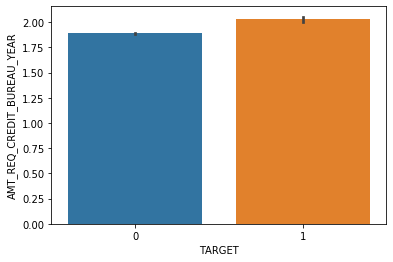

In [151]:
sn.barplot(application['TARGET'],application['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [152]:
for i in range(application.shape[0]):
    if np.isnan(application.loc[i,'AMT_REQ_CREDIT_BUREAU_YEAR']):
        if application.loc[i,'TARGET']==0:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_YEAR']=1.90
        else:
            application.loc[i,'AMT_REQ_CREDIT_BUREAU_YEAR']=2.1

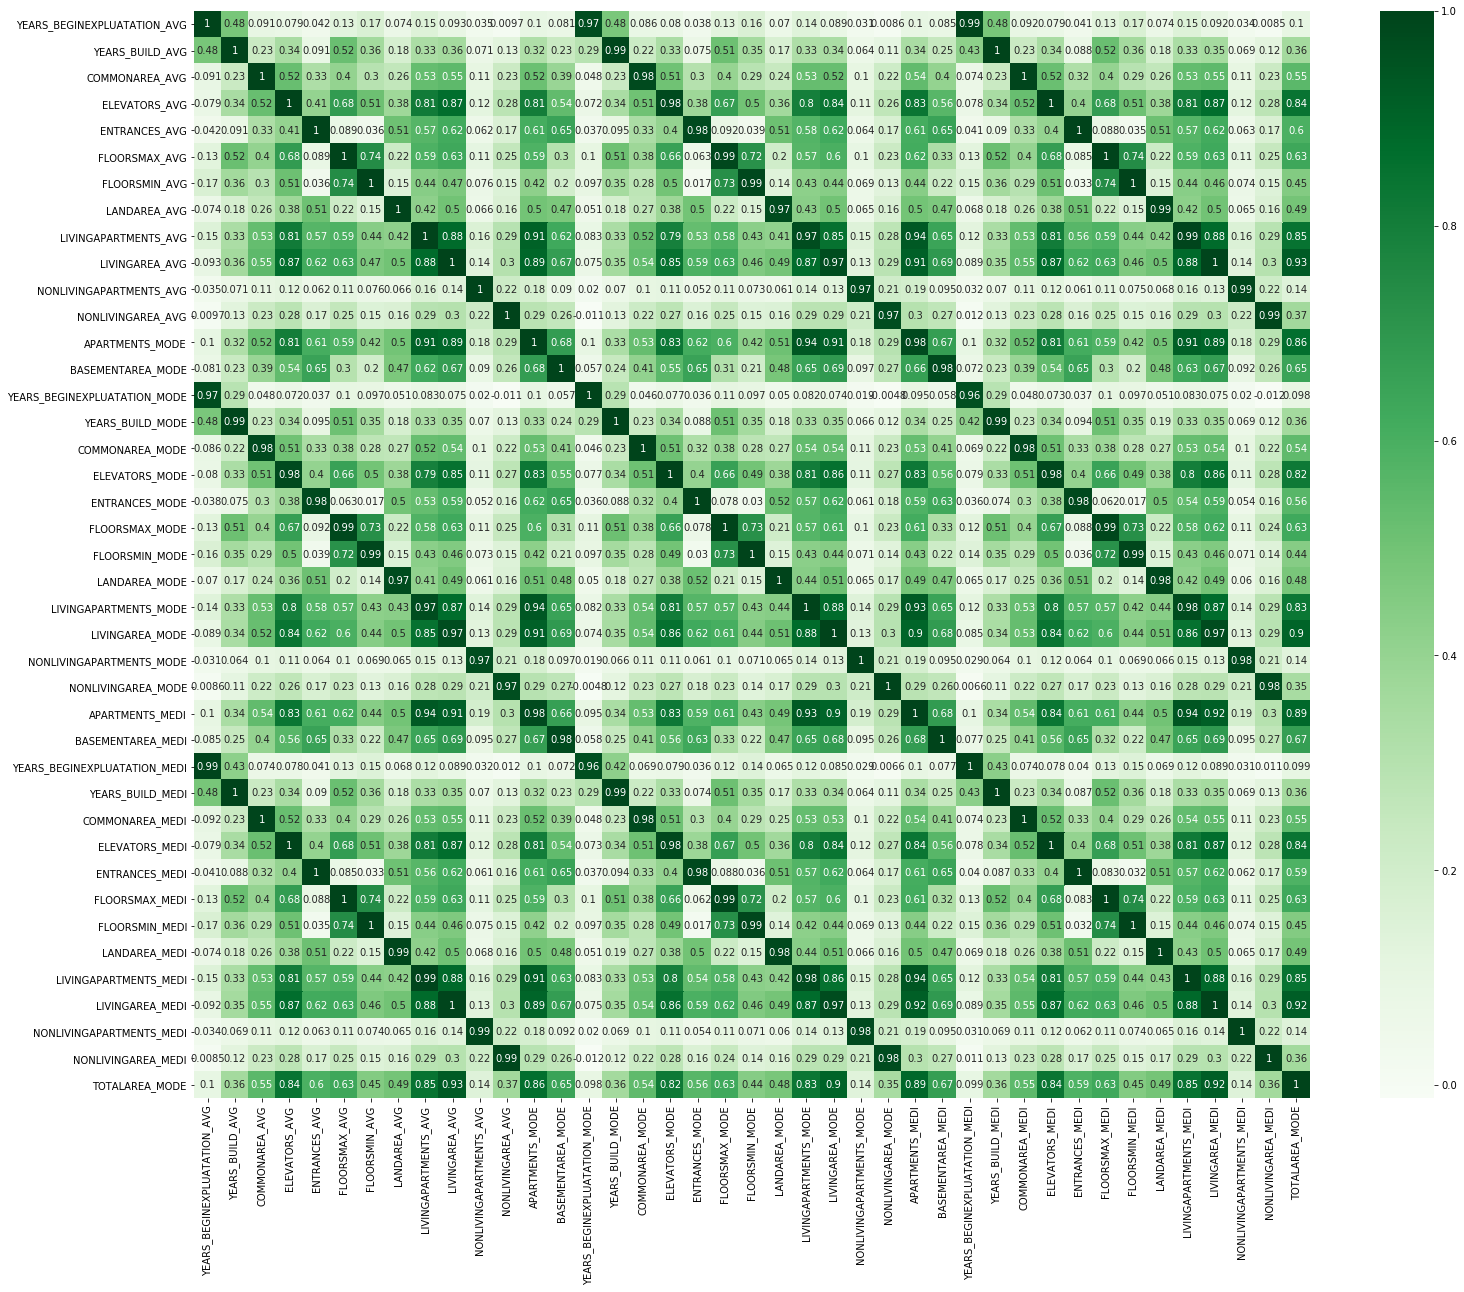

In [153]:
plt.figure(figsize=(25,20))
sn.heatmap(application[['YEARS_BEGINEXPLUATATION_AVG'
             ,'YEARS_BUILD_AVG'
             ,'COMMONAREA_AVG'
             ,'ELEVATORS_AVG'
             ,'ENTRANCES_AVG'
             ,'FLOORSMAX_AVG'
             ,'FLOORSMIN_AVG'
             ,'LANDAREA_AVG'
             ,'LIVINGAPARTMENTS_AVG'
             ,'LIVINGAREA_AVG'
             ,'NONLIVINGAPARTMENTS_AVG'
             ,'NONLIVINGAREA_AVG'
             ,'APARTMENTS_MODE'
             ,'BASEMENTAREA_MODE'
             ,'YEARS_BEGINEXPLUATATION_MODE'
             ,'YEARS_BUILD_MODE'
             ,'COMMONAREA_MODE'
             ,'ELEVATORS_MODE'
             ,'ENTRANCES_MODE'
             ,'FLOORSMAX_MODE'
             ,'FLOORSMIN_MODE'
             ,'LANDAREA_MODE'
             ,'LIVINGAPARTMENTS_MODE'
             ,'LIVINGAREA_MODE'
             ,'NONLIVINGAPARTMENTS_MODE'
             ,'NONLIVINGAREA_MODE'
             ,'APARTMENTS_MEDI'
             ,'BASEMENTAREA_MEDI'
             ,'YEARS_BEGINEXPLUATATION_MEDI'
             ,'YEARS_BUILD_MEDI'
             ,'COMMONAREA_MEDI'
             ,'ELEVATORS_MEDI'
             ,'ENTRANCES_MEDI'
             ,'FLOORSMAX_MEDI'
             ,'FLOORSMIN_MEDI'
             ,'LANDAREA_MEDI'
             ,'LIVINGAPARTMENTS_MEDI'
             ,'LIVINGAREA_MEDI'
             ,'NONLIVINGAPARTMENTS_MEDI'
             ,'NONLIVINGAREA_MEDI'
             ,'TOTALAREA_MODE']].corr(),annot=True,cmap='Greens')

In [154]:
from tqdm import tqdm

In [155]:
cols1=set()
cols2=set()
matrix=application[['YEARS_BEGINEXPLUATATION_AVG'
             ,'YEARS_BUILD_AVG'
             ,'COMMONAREA_AVG'
             ,'ELEVATORS_AVG'
             ,'ENTRANCES_AVG'
             ,'FLOORSMAX_AVG'
             ,'FLOORSMIN_AVG'
             ,'LANDAREA_AVG'
             ,'LIVINGAPARTMENTS_AVG'
             ,'LIVINGAREA_AVG'
             ,'NONLIVINGAPARTMENTS_AVG'
             ,'NONLIVINGAREA_AVG'
             ,'APARTMENTS_MODE'
             ,'BASEMENTAREA_MODE'
             ,'YEARS_BEGINEXPLUATATION_MODE'
             ,'YEARS_BUILD_MODE'
             ,'COMMONAREA_MODE'
             ,'ELEVATORS_MODE'
             ,'ENTRANCES_MODE'
             ,'FLOORSMAX_MODE'
             ,'FLOORSMIN_MODE'
             ,'LANDAREA_MODE'
             ,'LIVINGAPARTMENTS_MODE'
             ,'LIVINGAREA_MODE'
             ,'NONLIVINGAPARTMENTS_MODE'
             ,'NONLIVINGAREA_MODE'
             ,'APARTMENTS_MEDI'
             ,'BASEMENTAREA_MEDI'
             ,'YEARS_BEGINEXPLUATATION_MEDI'
             ,'YEARS_BUILD_MEDI'
             ,'COMMONAREA_MEDI'
             ,'ELEVATORS_MEDI'
             ,'ENTRANCES_MEDI'
             ,'FLOORSMAX_MEDI'
             ,'FLOORSMIN_MEDI'
             ,'LANDAREA_MEDI'
             ,'LIVINGAPARTMENTS_MEDI'
             ,'LIVINGAREA_MEDI'
             ,'NONLIVINGAPARTMENTS_MEDI'
             ,'NONLIVINGAREA_MEDI'
             ,'TOTALAREA_MODE']].corr()
matrix.shape

(41, 41)

removing intersection cols. for ex:: think we have 3 columns c1,c2,c3. Now,c1andc2 are correlated highly and also c2 and c3. but c1 and c3 are not very correlated.SO, we can just remove c2 and it removes the multicollinearity problem if we have those  only features.

In [156]:
cols1=set()
cols2=set()
for i in range(41):
    for j in range(41):
        if i<j:
            if matrix.iloc[i,j]>0.6:
                cols1.add(i)
                cols2.add(j)
print(cols1.intersection(cols2))

{5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 33, 36, 37}


In [157]:
inter_cols=list(cols1.intersection(cols2))

In [158]:
matrix.columns[inter_cols]

Index(['FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI'],
      dtype='object')

In [159]:
application.drop(list(matrix.columns[inter_cols]),axis=1,inplace=True)

In [160]:
total_columns=list(matrix.columns)

In [161]:
l=[col for col in total_columns if col not in matrix.columns[inter_cols]]

In [162]:
matrix=application[l].corr()

In [163]:
matrix

,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
YEARS_BEGINEXPLUATATION_AVG,1.000000,0.483564,0.091483,0.078921,0.042075,0.073917,0.034979,0.009666,0.993825,0.482951,0.091667,0.166756,0.074067,0.034079,0.008453,0.100319
YEARS_BUILD_AVG,0.483564,1.000000,0.232259,0.343318,0.090591,0.180621,0.070929,0.127709,0.426564,0.998495,0.232810,0.358984,0.181592,0.069234,0.124901,0.359263
COMMONAREA_AVG,0.091483,0.232259,1.000000,0.522166,0.326264,0.257046,0.105582,0.227615,0.074048,0.231841,0.995978,0.294866,0.258217,0.105081,0.227138,0.553260
ELEVATORS_AVG,0.078921,0.343318,0.522166,1.000000,0.405205,0.375280,0.121668,0.283367,0.077703,0.342508,0.521894,0.509450,0.376531,0.120841,0.280142,0.844628
ENTRANCES_AVG,0.042075,0.090591,0.326264,0.405205,1.000000,0.508256,0.061533,0.165729,0.040565,0.089864,0.327692,0.035020,0.511140,0.062555,0.166998,0.595290
LANDAREA_AVG,0.073917,0.180621,0.257046,0.375280,0.508256,1.000000,0.065855,0.163538,0.068477,0.180393,0.259076,0.148545,0.991610,0.064650,0.164797,0.491091
NONLIVINGAPARTMENTS_AVG,0.034979,0.070929,0.105582,0.121668,0.061533,0.065855,1.000000,0.217269,0.031624,0.070491,0.105544,0.075320,0.067739,0.990768,0.216707,0.144151
NONLIVINGAREA_AVG,0.009666,0.127709,0.227615,0.283367,0.165729,0.163538,0.217269,1.000000,0.011543,0.127783,0.227574,0.152033,0.163489,0.217242,0.990444,0.366604
YEARS_BEGINEXPLUATATION_MEDI,0.993825,0.426564,0.074048,0.077703,0.040565,0.068477,0.031624,0.011543,1.000000,0.427103,0.074257,0.146234,0.068613,0.030913,0.010547,0.099055
YEARS_BUILD_MEDI,0.482951,0.998495,0.231841,0.342508,0.089864,0.180393,0.070491,0.127783,0.427103,1.000000,0.232778,0.359135,0.181319,0.069126,0.125151,0.357972


In [164]:
matrix.shape

(16, 16)

Now, as we removed intercols now removing other correlated features.

In [165]:
remove_cols=set()
for i in tqdm(range(16)):
    for j in tqdm(range(16)):
        if i<j:
            if matrix.iloc[i,j]>=0.6:
                remove_cols.add(i)

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<00:00, 16043.24it/s]

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<00:00, 501.35it/s]


In [166]:
matrix.columns[list(remove_cols)]

Index(['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG'],
      dtype='object')

In [167]:
list_cols=list(matrix.columns[list(remove_cols)])

In [168]:
list_cols

['YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG']

In [169]:
application.drop(list_cols,axis=1,inplace=True)

In [170]:
remaining_cols=[col for col in matrix if col not in list_cols]

In [171]:
remaining_cols

['ENTRANCES_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']

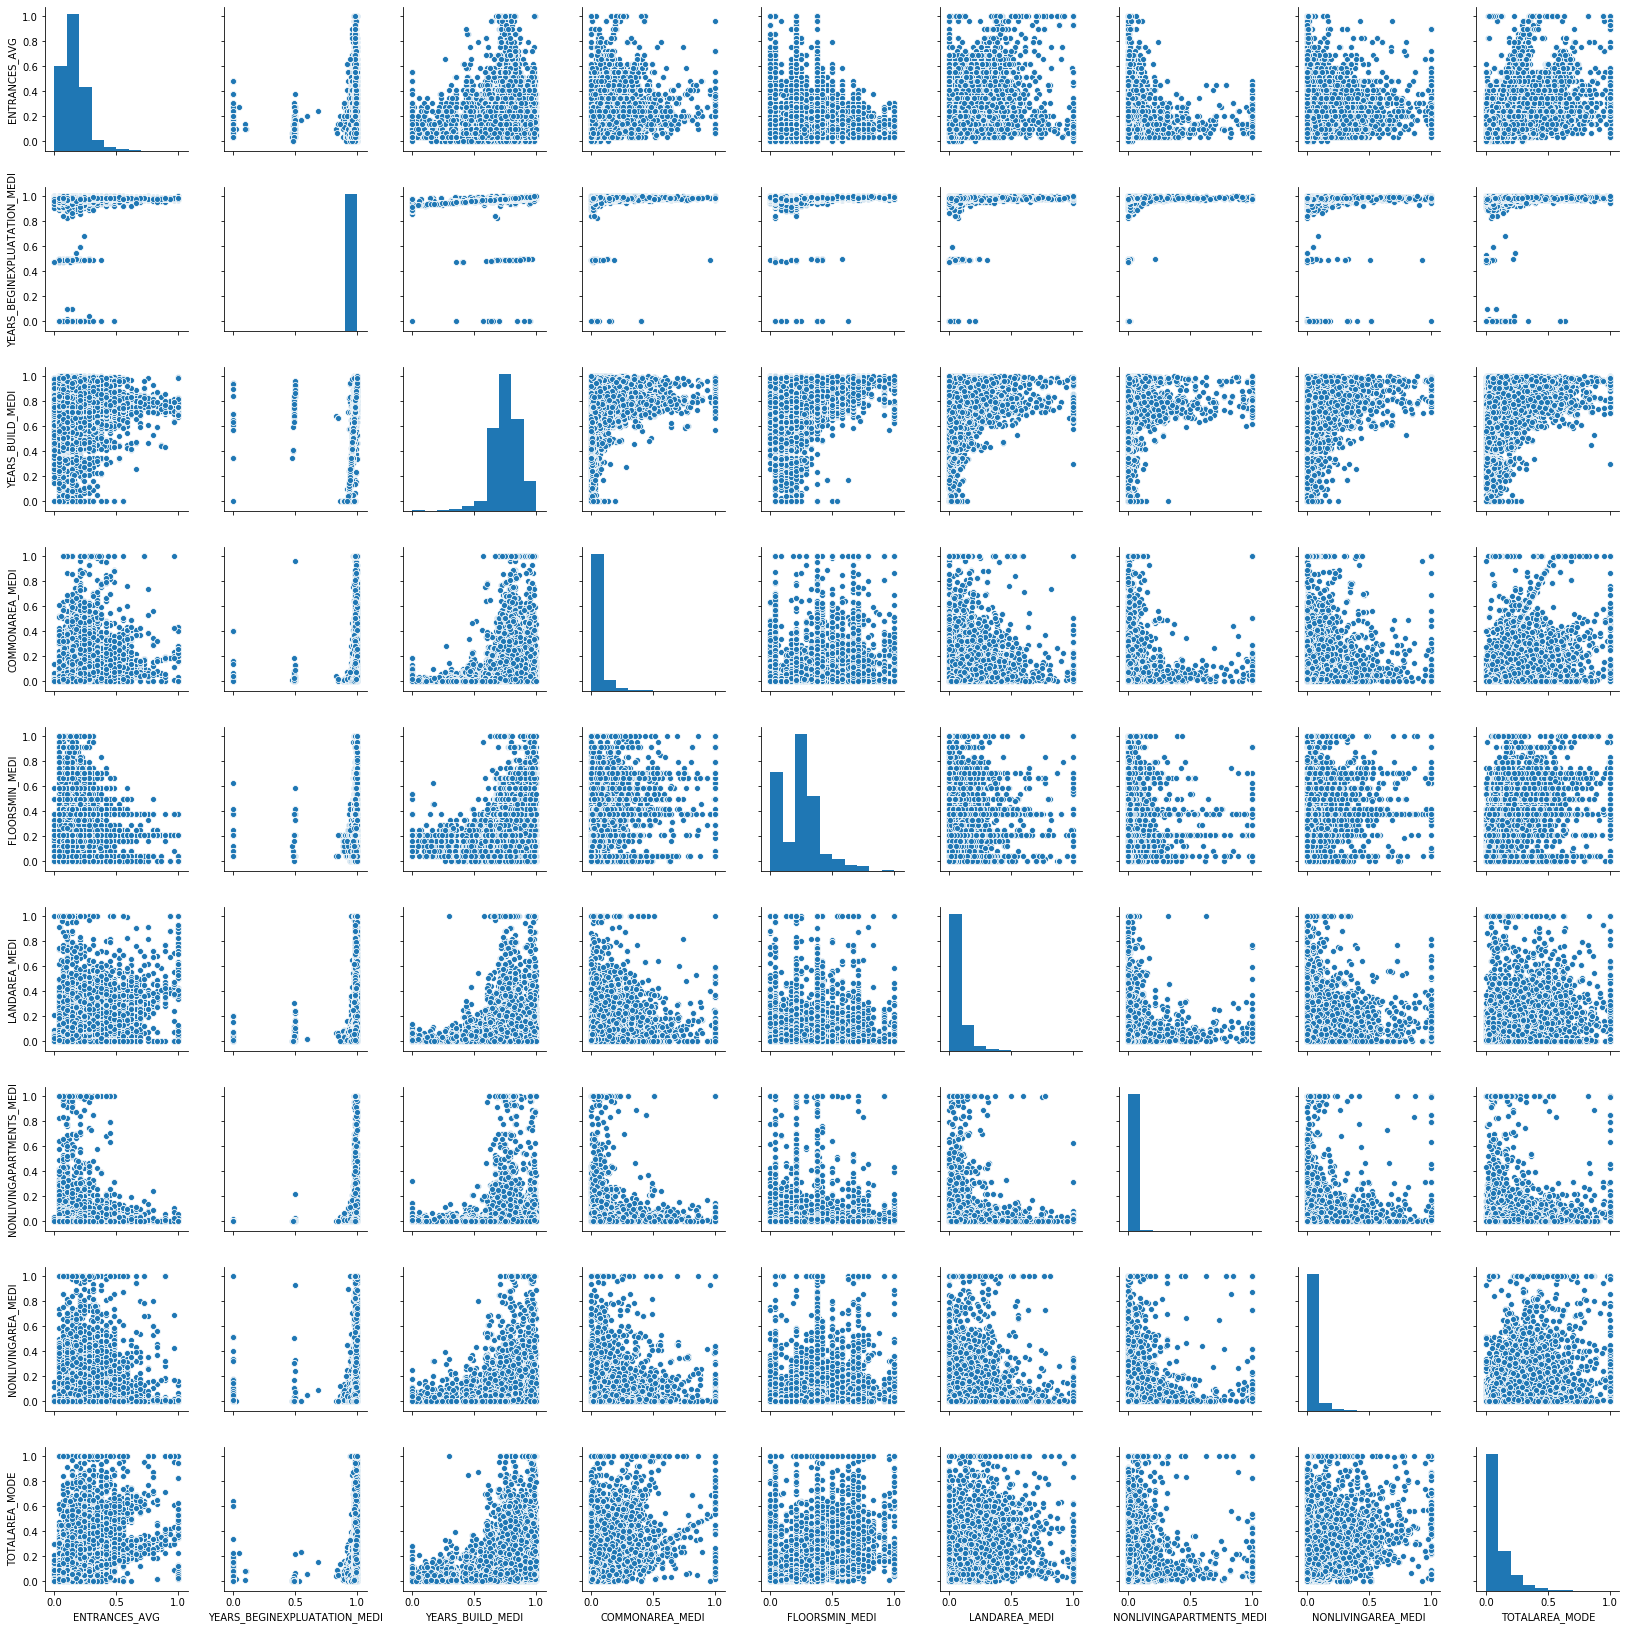

In [172]:
sn.pairplot(application[remaining_cols],hue=application['TARGET'])

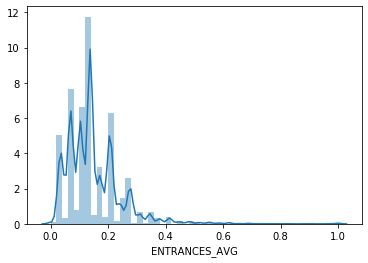

In [181]:
sn.distplot(application['ENTRANCES_AVG'])

In [182]:
application['ENTRANCES_AVG'].fillna(value=-1,inplace=True)


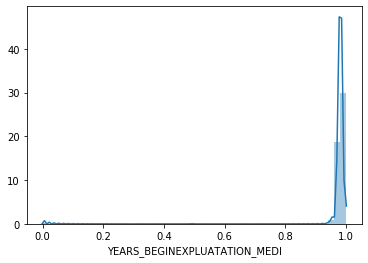

In [184]:
sn.distplot(application['YEARS_BEGINEXPLUATATION_MEDI'])

In [186]:
application['YEARS_BEGINEXPLUATATION_MEDI'].fillna(value=-1,inplace=True)

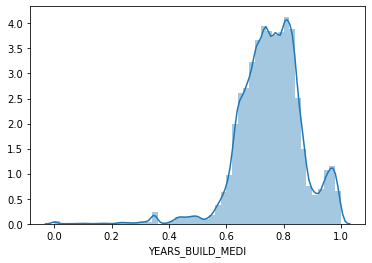

In [187]:
sn.distplot(application['YEARS_BUILD_MEDI'])

In [188]:
application['YEARS_BUILD_MEDI'].fillna(value=-1,inplace=True)

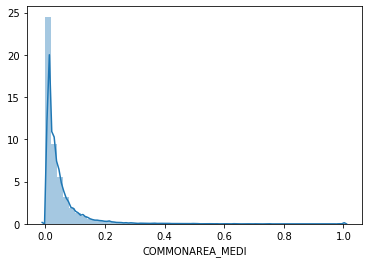

In [189]:
sn.distplot(application['COMMONAREA_MEDI'])

In [190]:
application['COMMONAREA_MEDI'].fillna(value=-1,inplace=True)

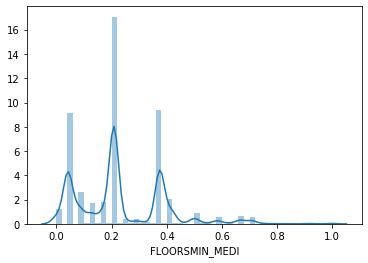

In [191]:
sn.distplot(application['FLOORSMIN_MEDI'])

In [192]:
application.fillna(value=-1,inplace=True)

In [195]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 127 entries, TARGET to ('rare_organisationorganisation',)
dtypes: float64(88), int64(35), object(4)
memory usage: 298.0+ MB


In [200]:
dtypes=pd.DataFrame(application.dtypes)

In [202]:
dtypes[dtypes[0]=='object']

,0
FONDKAPREMONT_MODE,object
HOUSETYPE_MODE,object
WALLSMATERIAL_MODE,object
EMERGENCYSTATE_MODE,object


In [209]:
application['FONDKAPREMONT_MODE'] =application['FONDKAPREMONT_MODE'].apply(lambda x:'fond_mode_missing' if x==-1 else x)
application['HOUSETYPE_MODE']     =application['HOUSETYPE_MODE'].apply(lambda x:'HOUSETYPE_missing' if x==-1 else x)
application['WALLSMATERIAL_MODE'] =application['WALLSMATERIAL_MODE'].apply(lambda x:'WALLSMATERIAL_missing' if x==-1 else x)
application['EMERGENCYSTATE_MODE']=application['EMERGENCYSTATE_MODE'].apply(lambda x:'EMERGENCYSTATE_missing' if x==-1 else x)

In [210]:
from sklearn.feature_selection import SelectKBest,chi2

In [211]:
data=pd.get_dummies(application[['FONDKAPREMONT_MODE'
                                 ,'HOUSETYPE_MODE'    
                                 ,'WALLSMATERIAL_MODE'
                                 ,'EMERGENCYSTATE_MODE']],drop_first=True)

In [207]:
selectk=SelectKBest(score_func=chi2,k='all')

checking whether these features are any use.

In [214]:
selectk.fit_transform(data,application['TARGET'])

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [222]:
selecting=pd.DataFrame(selectk.scores_,columns=['scores'])

In [224]:
data_cols=pd.DataFrame(data.columns)

In [226]:
final_=selecting.join(data_cols)

In [227]:
final_.sort_values(by='scores',inplace=True,ascending=False)

In [228]:
final_

,scores,0
10,264.862637,WALLSMATERIAL_MODE_Panel
14,263.729128,EMERGENCYSTATE_MODE_No
4,258.728592,HOUSETYPE_MODE_block of flats
12,234.587377,WALLSMATERIAL_MODE_WALLSMATERIAL_missing
2,119.218038,FONDKAPREMONT_MODE_reg oper account
11,38.877721,"WALLSMATERIAL_MODE_Stone, brick"
1,38.445071,FONDKAPREMONT_MODE_org spec account
3,37.439616,FONDKAPREMONT_MODE_reg oper spec account
8,26.920664,WALLSMATERIAL_MODE_Monolithic
13,19.079061,WALLSMATERIAL_MODE_Wooden


In [229]:
application=application.join(data)

In [230]:
application.drop(['FONDKAPREMONT_MODE'
                                 ,'HOUSETYPE_MODE'    
                                 ,'WALLSMATERIAL_MODE'
                                 ,'EMERGENCYSTATE_MODE'],axis=1,inplace=True)

In [231]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 139 entries, TARGET to EMERGENCYSTATE_MODE_Yes
dtypes: float64(88), int64(35), uint8(16)
memory usage: 293.3 MB


In [232]:
with open('application.csv','w') as f:
    application.to_csv(f,index=False)